In [18]:
!pip install roboflow

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="cga3jQ8CPGGIwSIpK8MZ")
project = rf.workspace("gadjiiavov-n4n8k").project("fire-fhsxx")
version = project.version(2)
dataset1 = version.download("yolov8")

project = rf.workspace("veli-t").project("firesmokedetection-5w49j")
version = project.version(4)
dataset2 = version.download("yolov8")

project = rf.workspace("ipv-investigacao").project("wildfire-detection-5odum")
version = project.version(5)
dataset3 = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fire-2 in yolov8:: 100%|██████████| 16924/16924 [00:02<00:00, 8416.39it/s] 


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FireSmokeDetection-4 in yolov8:: 100%|██████████| 12954/12954 [00:01<00:00, 8408.19it/s] 

loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to Wildfire-Detection-5 in yolov8:: 100%|██████████| 16272/16272 [00:02<00:00, 7434.71it/s] 


In [3]:
import os

def remap_labels(label_dir):
    for label_file in os.listdir(label_dir):
        if not label_file.endswith(".txt"):
            continue

        path = os.path.join(label_dir, label_file)
        new_lines = []

        with open(path, "r") as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])

            # Remap:
            if class_id == 1:  # 'Fire' or 'fire'
                print('found')
                new_class = 0  # unified 'fire'
            elif class_id == 2:  # 'smoke'
                new_class = 1
            else:
                continue  # Skip unknown classes

            parts[0] = str(new_class)
            new_lines.append(" ".join(parts))

        # Write the cleaned label file back
        with open(path, "w") as f:
            f.write("\n".join(new_lines))

# Example usage:
remap_labels("/kaggle/working/FireSmokeDetection-4/train/labels")
remap_labels("/kaggle/working/FireSmokeDetection-4/valid/labels")
remap_labels("/kaggle/working/FireSmokeDetection-4/test/labels")


found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
found
foun

In [4]:
import os

Combined_files = [
    '/kaggle/working/Combined_Datasets/test/images',
    '/kaggle/working/Combined_Datasets/test/labels',
    '/kaggle/working/Combined_Datasets/train/images',
    '/kaggle/working/Combined_Datasets/train/labels',
    '/kaggle/working/Combined_Datasets/valid/images',
    '/kaggle/working/Combined_Datasets/valid/labels'
]

for folder in Combined_files:
    os.makedirs(folder, exist_ok=True)

print("Folders created successfully.")

Folders created successfully.


In [5]:
!cp /kaggle/input/yaml-file/data.yaml /kaggle/working/Combined_Datasets/data.yaml

In [6]:
import shutil
import os
dataset1_files = ['/kaggle/working/fire-2/test/images','/kaggle/working/fire-2/test/labels',
 '/kaggle/working/fire-2/train/images','/kaggle/working/fire-2/train/labels',
 '/kaggle/working/fire-2/valid/images','/kaggle/working/fire-2/valid/labels']

dataset2_files = ['/kaggle/working/FireSmokeDetection-4/test/images','/kaggle/working/FireSmokeDetection-4/test/labels',
 '/kaggle/working/FireSmokeDetection-4/train/images','/kaggle/working/FireSmokeDetection-4/train/labels',
 '/kaggle/working/FireSmokeDetection-4/valid/images','/kaggle/working/FireSmokeDetection-4/valid/labels']

dataset3_files = ['/kaggle/working/Wildfire-Detection-5/test/images','/kaggle/working/Wildfire-Detection-5/test/labels',
 '/kaggle/working/Wildfire-Detection-5/train/images','/kaggle/working/Wildfire-Detection-5/train/labels',
 '/kaggle/working/Wildfire-Detection-5/valid/images','/kaggle/working/Wildfire-Detection-5/valid/labels']

Combined_files = ['/kaggle/working/Combined_Datasets/test/images','/kaggle/working/Combined_Datasets/test/labels',
 '/kaggle/working/Combined_Datasets/train/images','/kaggle/working/Combined_Datasets/train/labels',
 '/kaggle/working/Combined_Datasets/valid/images','/kaggle/working/Combined_Datasets/valid/labels']
datasets = [dataset1_files, dataset2_files, dataset3_files]
datasets_names = ['fire-2', 'FireSmokeDetection-4', 'Wildfire-Detection-5']
for t in range(len(datasets)):
  print(f'moving {datasets_names[t]} dataset:')
  for i in range(len(Combined_files)):
    source_folder = datasets[t][i]
    destination_folder =  Combined_files[i]

    # Create destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Loop through all files in the source folder
    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)

        # Move each file
        shutil.move(source_path, destination_path)

    print(f"All files moved from {source_folder} to {destination_folder}")


moving fire-2 dataset:
All files moved from /kaggle/working/fire-2/test/images to /kaggle/working/Combined_Datasets/test/images
All files moved from /kaggle/working/fire-2/test/labels to /kaggle/working/Combined_Datasets/test/labels
All files moved from /kaggle/working/fire-2/train/images to /kaggle/working/Combined_Datasets/train/images
All files moved from /kaggle/working/fire-2/train/labels to /kaggle/working/Combined_Datasets/train/labels
All files moved from /kaggle/working/fire-2/valid/images to /kaggle/working/Combined_Datasets/valid/images
All files moved from /kaggle/working/fire-2/valid/labels to /kaggle/working/Combined_Datasets/valid/labels
moving FireSmokeDetection-4 dataset:
All files moved from /kaggle/working/FireSmokeDetection-4/test/images to /kaggle/working/Combined_Datasets/test/images
All files moved from /kaggle/working/FireSmokeDetection-4/test/labels to /kaggle/working/Combined_Datasets/test/labels
All files moved from /kaggle/working/FireSmokeDetection-4/train/

In [7]:
import os

Combined_files = ['/kaggle/working/Combined_Datasets/test/images','/kaggle/working/Combined_Datasets/test/labels',
 '/kaggle/working/Combined_Datasets/train/images','/kaggle/working/Combined_Datasets/train/labels',
 '/kaggle/working/Combined_Datasets/valid/images','/kaggle/working/Combined_Datasets/valid/labels']

for i in Combined_files:

  folder_path = i

  file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
  print(f"Number of files in '{folder_path}': {file_count}")


Number of files in '/kaggle/working/Combined_Datasets/test/images': 1179
Number of files in '/kaggle/working/Combined_Datasets/test/labels': 1179
Number of files in '/kaggle/working/Combined_Datasets/train/images': 19695
Number of files in '/kaggle/working/Combined_Datasets/train/labels': 19695
Number of files in '/kaggle/working/Combined_Datasets/valid/images': 2183
Number of files in '/kaggle/working/Combined_Datasets/valid/labels': 2183


In [8]:
!nividia-smi

/bin/bash: line 1: nividia-smi: command not found


In [9]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 26.5 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing

In [24]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8s.pt')

# Train the model
model.train(
    data='/kaggle/working/Combined_Datasets/data.yaml',
    epochs=50,
    imgsz=640,
    batch=32,
    name='fire-smoke-combined',
    
    # Augmentations
    hsv_h=0.3,
    hsv_s=0.3,
    hsv_v=0.3,
    degrees=30,
    translate=0.2,
    scale=0.2,
    shear=0.2,
    perspective=0.001,
    flipud=0.5,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,

    # Learning rate
    lr0=0.01,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    optimizer='SGD',

    # Early stopping
    patience=10,
    val=True,
    
    # Save settings
    save_period=5
)

Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Combined_Datasets/data.yaml, degrees=30, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.3, hsv_s=0.3, hsv_v=0.3, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fire-smoke-combined7, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=10, perspective=0.001, plot

train: Scanning /kaggle/working/Combined_Datasets/train/labels.cache... 19695 images, 2675 backgrounds, 0 corrupt: 100%|██████████| 19695/19695 [00:00<?, ?it/s]

train: /kaggle/working/Combined_Datasets/train/images/0111_jpg.rf.79c7400a0c272f0903da870d3ed21c8f.jpg: 1 duplicate labels removed
train: /kaggle/working/Combined_Datasets/train/images/0111_jpg.rf.7fc30a7c69560140316109242769284a.jpg: 1 duplicate labels removed
train: /kaggle/working/Combined_Datasets/train/images/0111_jpg.rf.995735d3e2a34f52d4746409c476c437.jpg: 1 duplicate labels removed
train: /kaggle/working/Combined_Datasets/train/images/Img_102_jpg.rf.6fef96a4e6190b10afdeb6a40cd6b909.jpg: 1 duplicate labels removed
train: /kaggle/working/Combined_Datasets/train/images/Img_102_jpg.rf.798a16678b1e5fc9e88e5dd712d8209c.jpg: 1 duplicate labels removed
train: /kaggle/working/Combined_Datasets/train/images/Img_102_jpg.rf.bcfa4b0f305d3816f2c9ae78a7a22d3d.jpg: 1 duplicate labels removed
train: /kaggle/working/Combined_Datasets/train/images/Img_1049_jpg.rf.ab3df4ab482c5862494886152ca538e3.jpg: 1 duplicate labels removed
train: /kaggle/working/Combined_Datasets/train/images/Img_1049_jpg.rf.

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 34737. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 246.5±74.1 MB/s, size: 36.1 KB)


val: Scanning /kaggle/working/Combined_Datasets/valid/labels.cache... 2183 images, 193 backgrounds, 0 corrupt: 100%|██████████| 2183/2183 [00:00<?, ?it/s]

val: /kaggle/working/Combined_Datasets/valid/images/52_jpg.rf.50a17c320ec0dbc0d64eb24c74a1368c.jpg: 1 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1039_jpg.rf.1f0fe5f5e4cd2a7f7407d551a6b532d8.jpg: 1 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1166_jpg.rf.e943111880a6b4495ecb10f79e3e7726.jpg: 4 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1169_jpg.rf.b012f16c6367194d6fa30ff71cfdb44e.jpg: 2 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1188_jpg.rf.ca265a861e504247e2b9efbd494952fc.jpg: 2 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1208_jpg.rf.fa65f237b84414246c9772f5d9b88f72.jpg: 1 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1223_jpg.rf.39df756595c373a8c978771bb145cbf9.jpg: 1 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1787_jpg.rf.b783a8f

Plotting labels to runs/detect/fire-smoke-combined7/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fire-smoke-combined7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      14.5G      2.065      2.735      2.146         72        640: 100%|██████████| 616/616 [05:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.84it/s]


                   all       2183       3690      0.441      0.308       0.25     0.0849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.4G      1.876      2.257      1.972         53        640: 100%|██████████| 616/616 [05:37<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.90it/s]


                   all       2183       3690      0.376      0.312      0.256     0.0892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      10.3G      1.908      2.322      2.029         54        640: 100%|██████████| 616/616 [05:34<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.88it/s]


                   all       2183       3690      0.369      0.167       0.14     0.0528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      10.3G       1.94      2.425      2.083         93        640: 100%|██████████| 616/616 [05:34<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.86it/s]


                   all       2183       3690        0.4      0.312      0.251     0.0754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      10.4G       1.88      2.321      2.037         57        640: 100%|██████████| 616/616 [05:34<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.89it/s]


                   all       2183       3690      0.432       0.43      0.378      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.3G      1.836      2.232      2.004         49        640: 100%|██████████| 616/616 [05:34<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.78it/s]


                   all       2183       3690      0.487      0.465      0.403      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      10.4G      1.809      2.162      1.975         79        640: 100%|██████████| 616/616 [05:38<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.80it/s]


                   all       2183       3690      0.494      0.478       0.44      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.4G       1.78      2.116      1.954         51        640: 100%|██████████| 616/616 [05:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:21<00:00,  1.67it/s]


                   all       2183       3690      0.508      0.448       0.43      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.3G      1.765      2.073      1.934         59        640: 100%|██████████| 616/616 [05:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.73it/s]


                   all       2183       3690      0.562      0.467      0.469      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      10.4G      1.745      2.034      1.921         42        640: 100%|██████████| 616/616 [05:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.81it/s]


                   all       2183       3690      0.611      0.507      0.533      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      10.3G      1.733      2.003      1.904         58        640: 100%|██████████| 616/616 [05:41<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.76it/s]


                   all       2183       3690      0.589      0.458      0.495      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      10.3G      1.721      1.974      1.895         51        640: 100%|██████████| 616/616 [05:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.69it/s]


                   all       2183       3690      0.608      0.534      0.565      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      10.4G      1.707      1.937      1.881         49        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.74it/s]


                   all       2183       3690       0.63      0.533      0.573       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      10.4G      1.695      1.918      1.868         57        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.74it/s]

                   all       2183       3690      0.632      0.512      0.566      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      10.3G      1.681      1.883      1.857         58        640: 100%|██████████| 616/616 [05:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.87it/s]

                   all       2183       3690      0.659      0.522      0.583      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      10.4G       1.67       1.86      1.846         39        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.67it/s]


                   all       2183       3690      0.619      0.575      0.605      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.3G      1.661       1.85      1.845         32        640: 100%|██████████| 616/616 [05:43<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.74it/s]

                   all       2183       3690      0.655      0.544        0.6      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.3G      1.654      1.831       1.83         58        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.73it/s]

                   all       2183       3690      0.671      0.575      0.626      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      10.3G      1.642      1.818       1.82         54        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.74it/s]

                   all       2183       3690      0.666      0.573      0.628      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      10.4G      1.629      1.795      1.819         62        640: 100%|██████████| 616/616 [05:41<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.74it/s]

                   all       2183       3690      0.696      0.578      0.643      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.3G      1.617      1.763      1.803         39        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.74it/s]

                   all       2183       3690       0.69      0.568      0.643      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      10.3G      1.614      1.754      1.798         46        640: 100%|██████████| 616/616 [05:41<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.79it/s]

                   all       2183       3690      0.672       0.59      0.662      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      10.3G      1.603      1.731      1.785         55        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.86it/s]

                   all       2183       3690      0.702        0.6      0.662      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      10.3G      1.599      1.722      1.783         58        640: 100%|██████████| 616/616 [05:43<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.83it/s]

                   all       2183       3690      0.739      0.582      0.668      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      10.3G      1.583      1.693      1.771         42        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.73it/s]


                   all       2183       3690      0.728      0.593      0.682       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      10.3G       1.58      1.697       1.77         48        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.83it/s]

                   all       2183       3690       0.71      0.612      0.688      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.4G      1.566      1.657      1.756         43        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.75it/s]

                   all       2183       3690      0.738      0.607      0.694      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.3G      1.566      1.647      1.748         64        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.76it/s]

                   all       2183       3690      0.723      0.614      0.693      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.3G      1.549      1.626       1.74         60        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.87it/s]

                   all       2183       3690      0.739      0.626      0.707      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.3G      1.544      1.605      1.727         58        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.74it/s]


                   all       2183       3690      0.735      0.628      0.707      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.3G      1.538      1.601      1.724         46        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.80it/s]

                   all       2183       3690      0.735      0.629      0.709      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.3G       1.53      1.587      1.718         51        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.73it/s]

                   all       2183       3690      0.729      0.635      0.711      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.3G      1.527       1.57      1.714         50        640: 100%|██████████| 616/616 [05:39<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.78it/s]

                   all       2183       3690      0.756      0.625      0.718      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.3G       1.51       1.55      1.702         52        640: 100%|██████████| 616/616 [05:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.87it/s]

                   all       2183       3690      0.753      0.636      0.719      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      10.4G      1.504      1.538      1.694         49        640: 100%|██████████| 616/616 [05:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.81it/s]

                   all       2183       3690      0.743      0.643      0.722      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.3G      1.505      1.523      1.686         55        640: 100%|██████████| 616/616 [05:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.75it/s]

                   all       2183       3690      0.746      0.646      0.727      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      10.3G      1.493      1.512      1.678         53        640: 100%|██████████| 616/616 [05:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.73it/s]

                   all       2183       3690       0.73      0.658      0.723      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      10.3G       1.48      1.501      1.671         62        640: 100%|██████████| 616/616 [05:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.75it/s]

                   all       2183       3690      0.749      0.651      0.725      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      10.3G      1.474       1.48       1.66         47        640: 100%|██████████| 616/616 [05:39<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.81it/s]

                   all       2183       3690      0.757      0.644      0.729       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      10.3G      1.475      1.481      1.658         88        640: 100%|██████████| 616/616 [05:41<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.76it/s]

                   all       2183       3690      0.757      0.651      0.734      0.385


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      10.3G      1.309      1.008      1.535         25        640: 100%|██████████| 616/616 [05:37<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.78it/s]

                   all       2183       3690      0.748      0.658      0.737      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      10.3G      1.273       0.96      1.507         28        640: 100%|██████████| 616/616 [05:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.77it/s]

                   all       2183       3690      0.753      0.667      0.744      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      10.3G      1.256     0.9291      1.489         20        640: 100%|██████████| 616/616 [05:34<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.75it/s]

                   all       2183       3690      0.754      0.674      0.747      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      10.3G      1.241     0.9081      1.476         18        640: 100%|██████████| 616/616 [05:35<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.85it/s]

                   all       2183       3690      0.757      0.668      0.748      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      10.3G      1.214     0.8794      1.452         17        640: 100%|██████████| 616/616 [05:36<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.81it/s]

                   all       2183       3690      0.758      0.675      0.753      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      10.3G      1.205     0.8639      1.443         32        640: 100%|██████████| 616/616 [05:30<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.93it/s]

                   all       2183       3690      0.759      0.676      0.755      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      10.3G       1.19     0.8423      1.426         29        640: 100%|██████████| 616/616 [05:30<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.93it/s]

                   all       2183       3690      0.763      0.678      0.758       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      10.3G      1.172     0.8232      1.416         22        640: 100%|██████████| 616/616 [05:30<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.92it/s]

                   all       2183       3690      0.767       0.68       0.76      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      10.3G      1.158     0.8123      1.404         25        640: 100%|██████████| 616/616 [05:30<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.93it/s]

                   all       2183       3690      0.768      0.682       0.76      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      10.3G      1.145     0.7993      1.394         26        640: 100%|██████████| 616/616 [05:30<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:18<00:00,  1.85it/s]

                   all       2183       3690      0.766      0.684      0.761      0.413



50 epochs completed in 4.998 hours.
Optimizer stripped from runs/detect/fire-smoke-combined7/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/fire-smoke-combined7/weights/best.pt, 22.5MB

Validating runs/detect/fire-smoke-combined7/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:20<00:00,  1.68it/s]


                   all       2183       3690      0.764      0.685      0.761      0.413
                  Fire       1366       2496      0.749      0.694      0.752      0.401
                 Smoke        992       1194      0.779      0.675      0.769      0.424


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 5.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/fire-smoke-combined7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x794bd8502050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [25]:
#from ultralytics import YOLO

# Load your trained model (change the path if needed)
#model = YOLO('/kaggle/working/runs/detect/fire-smoke-combined/weights/best.pt')

# Evaluate the model using the validation set defined in the original YAML
metrics = model.val()

# Optional: Print key evaluation metrics
print(f"Precision: {metrics.box.p:.4f}")
print(f"Recall: {metrics.box.r:.4f}")
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")


Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 660.9±114.6 MB/s, size: 28.3 KB)


val: Scanning /kaggle/working/Combined_Datasets/valid/labels.cache... 2183 images, 193 backgrounds, 0 corrupt: 100%|██████████| 2183/2183 [00:00<?, ?it/s]

val: /kaggle/working/Combined_Datasets/valid/images/52_jpg.rf.50a17c320ec0dbc0d64eb24c74a1368c.jpg: 1 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1039_jpg.rf.1f0fe5f5e4cd2a7f7407d551a6b532d8.jpg: 1 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1166_jpg.rf.e943111880a6b4495ecb10f79e3e7726.jpg: 4 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1169_jpg.rf.b012f16c6367194d6fa30ff71cfdb44e.jpg: 2 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1188_jpg.rf.ca265a861e504247e2b9efbd494952fc.jpg: 2 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1208_jpg.rf.fa65f237b84414246c9772f5d9b88f72.jpg: 1 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1223_jpg.rf.39df756595c373a8c978771bb145cbf9.jpg: 1 duplicate labels removed
val: /kaggle/working/Combined_Datasets/valid/images/Img_1787_jpg.rf.b783a8f


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:29<00:00,  2.35it/s]


                   all       2183       3690      0.765      0.686      0.761      0.413
                  Fire       1366       2496      0.748      0.694      0.752      0.401
                 Smoke        992       1194      0.782      0.678      0.771      0.425


invalid value encountered in less
invalid value encountered in less


Speed: 0.5ms preprocess, 9.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/fire-smoke-combined72


TypeError: unsupported format string passed to numpy.ndarray.__format__

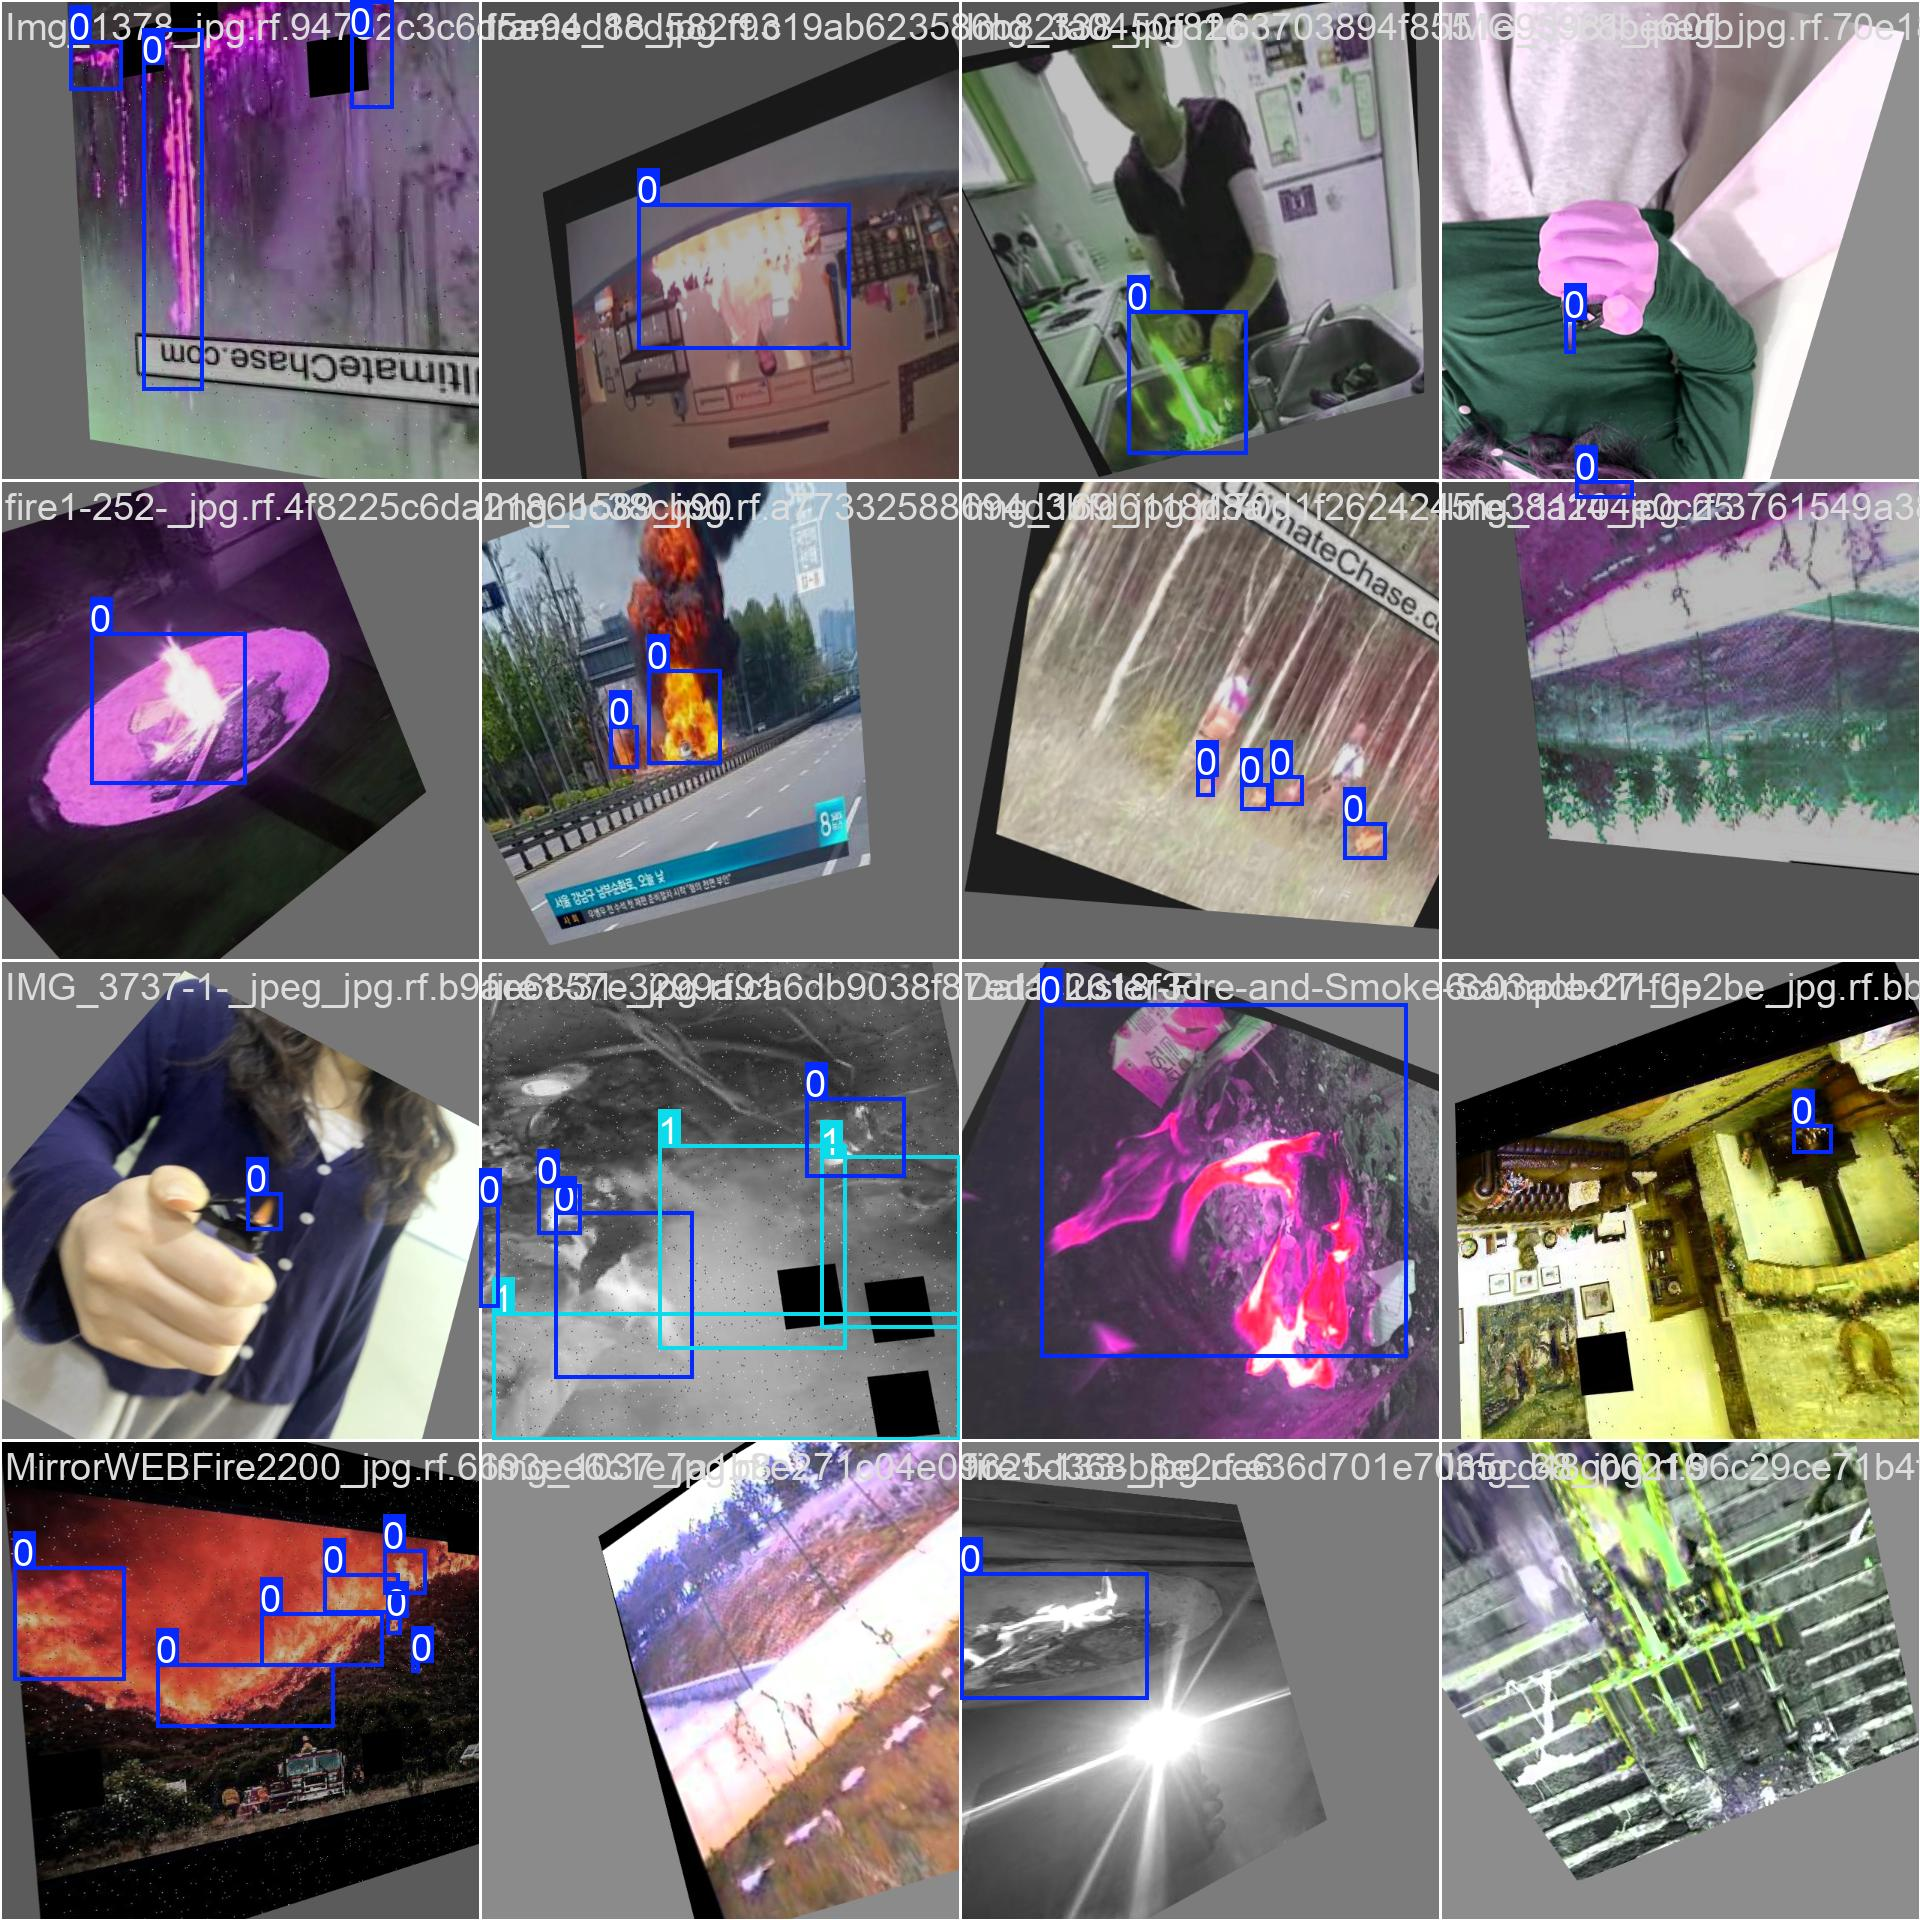

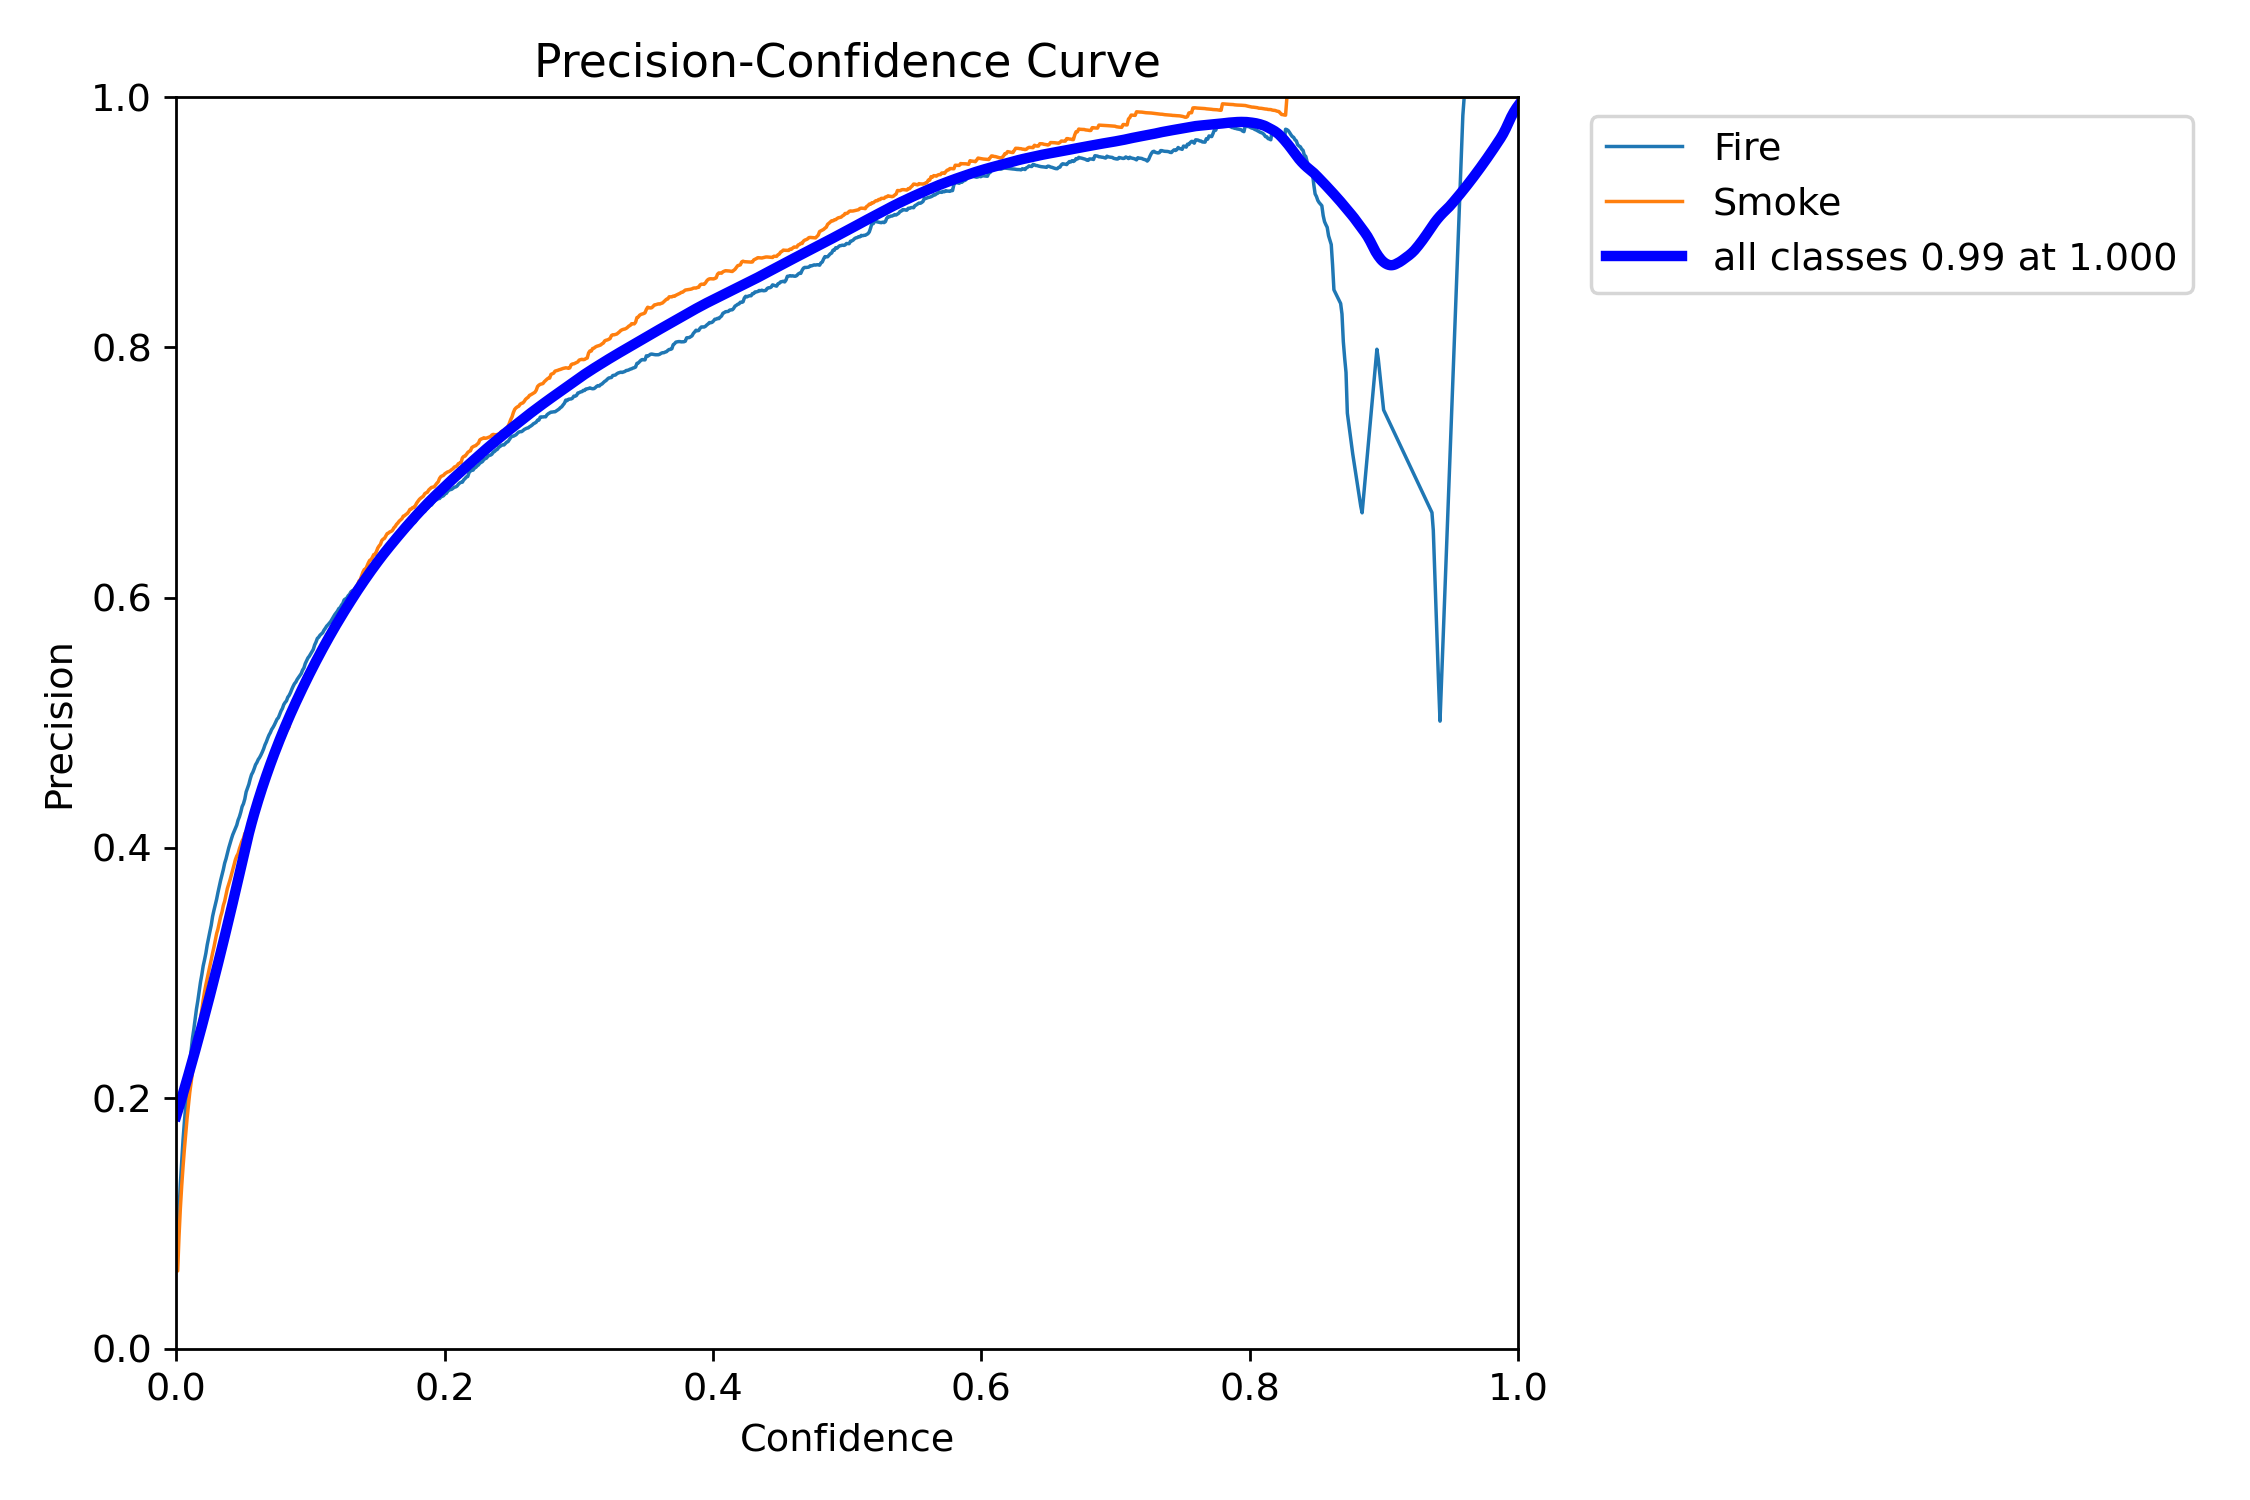

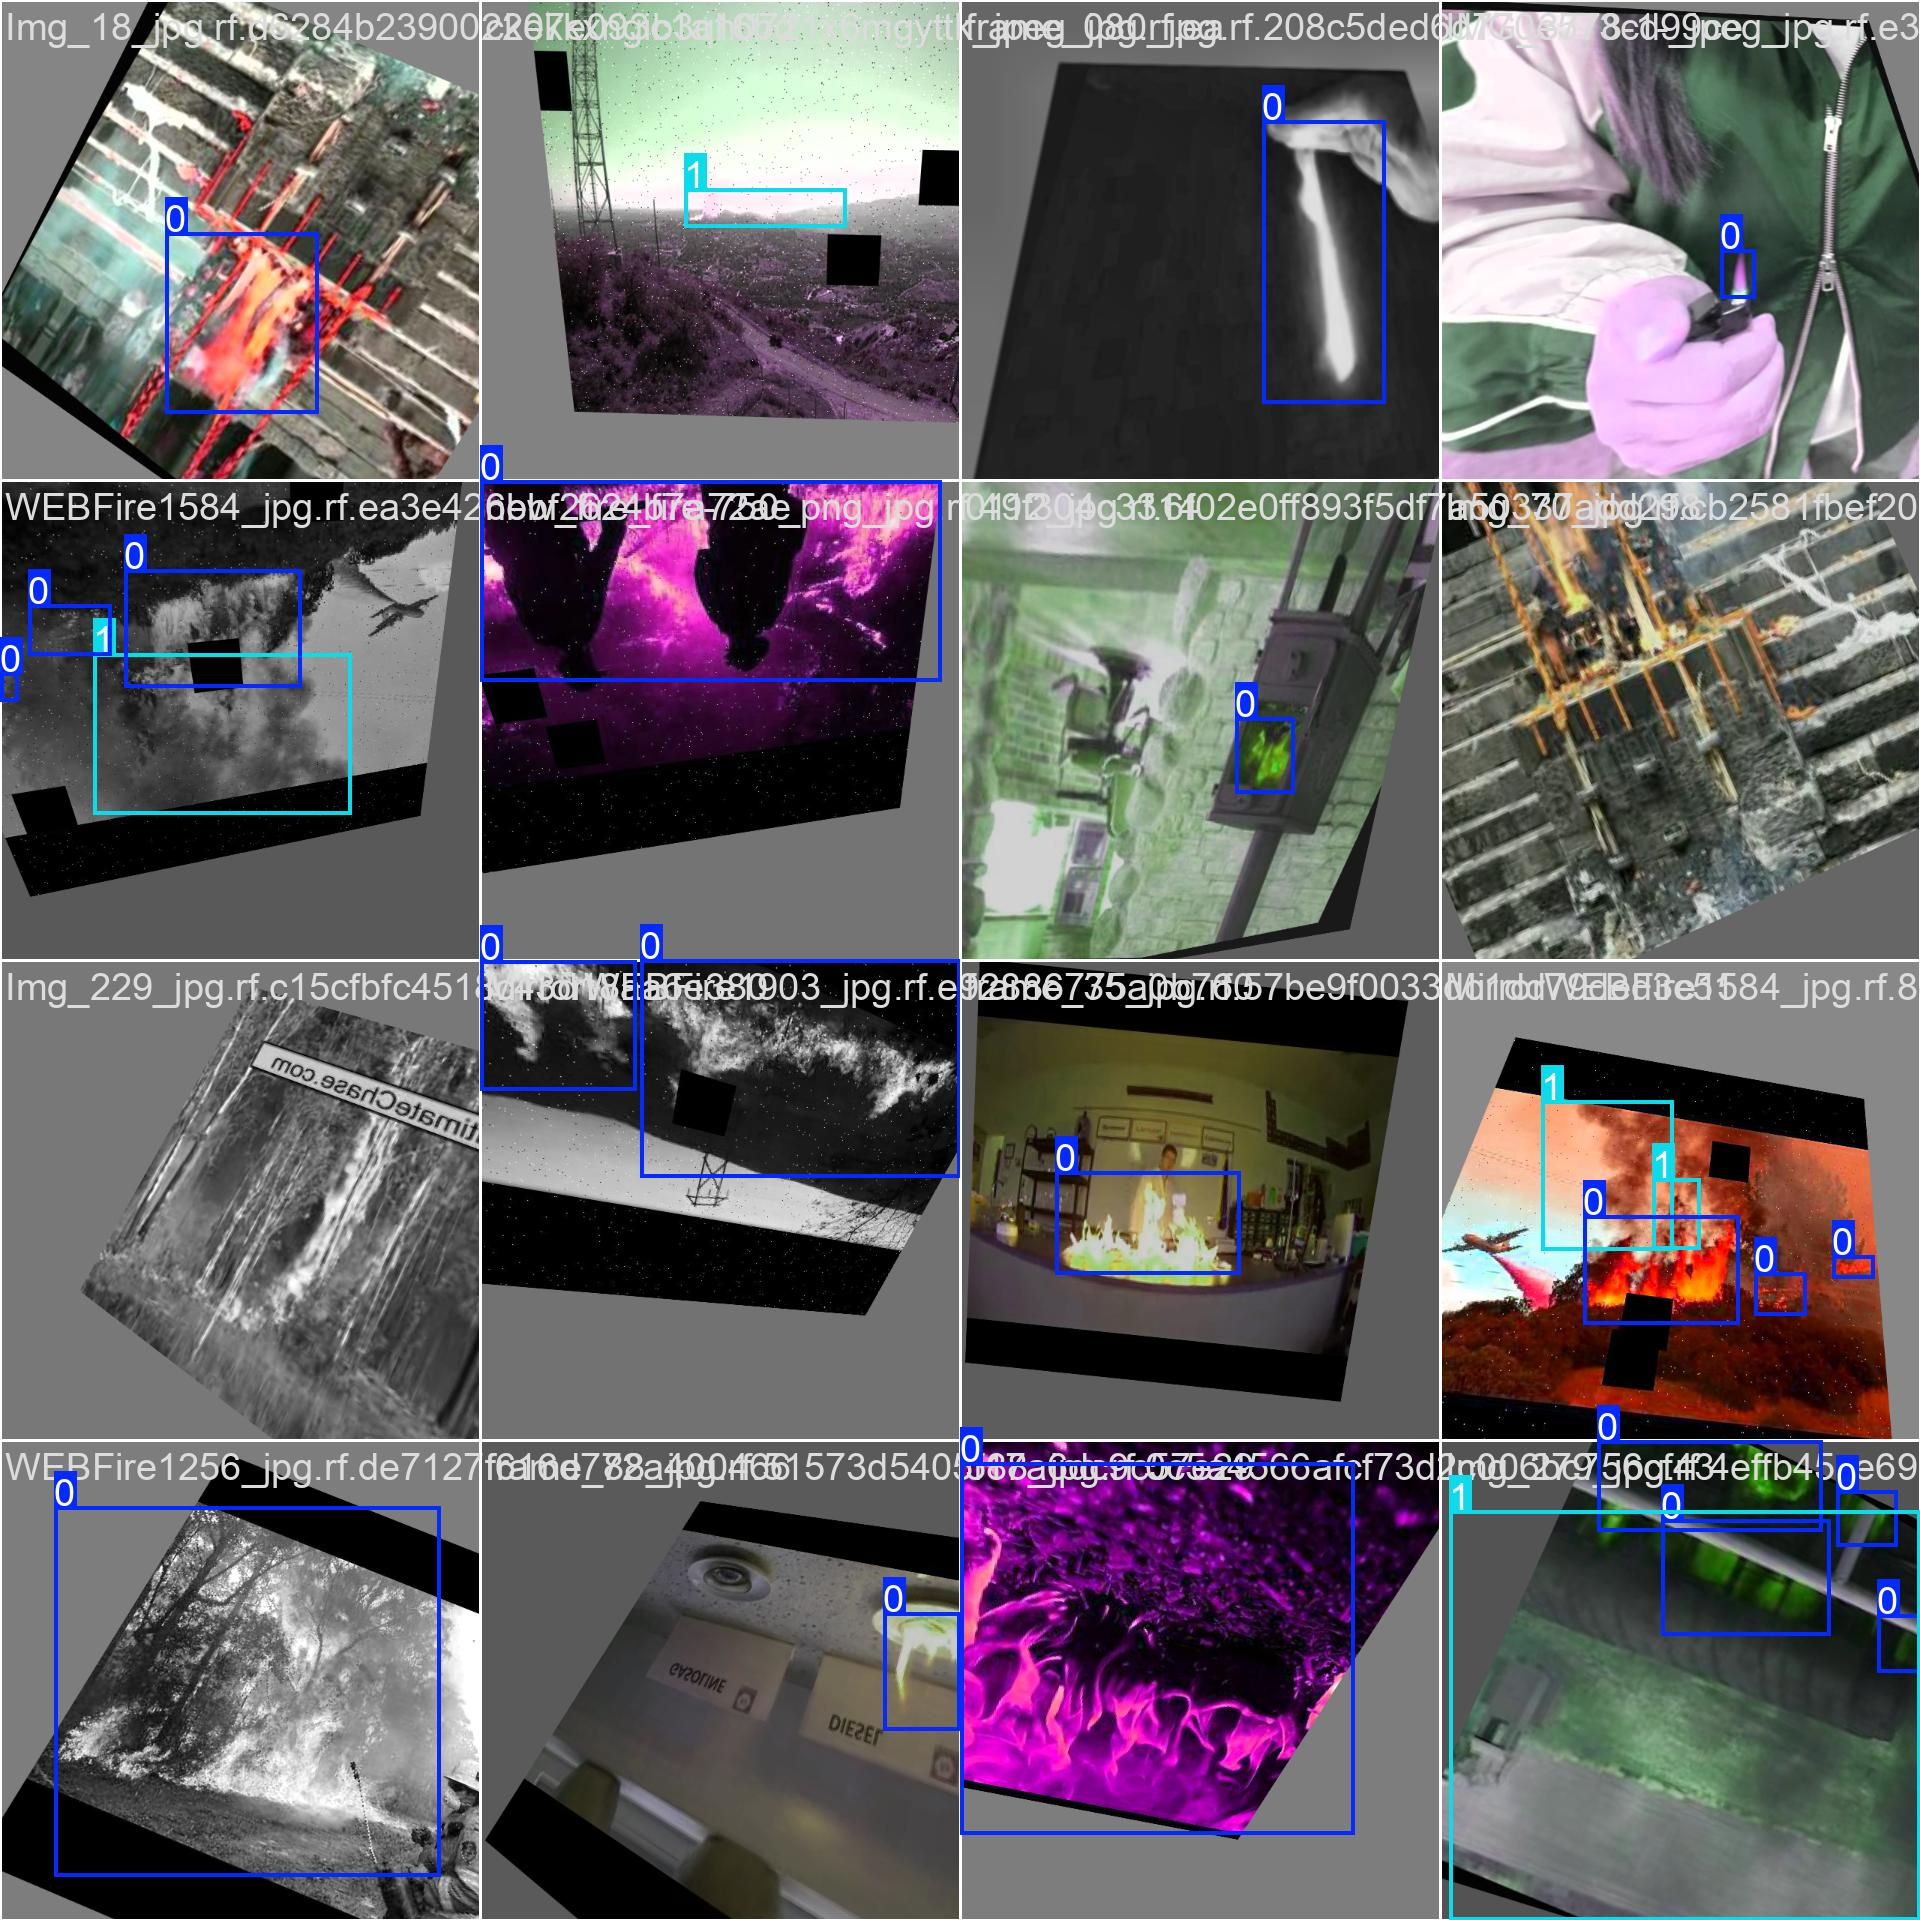

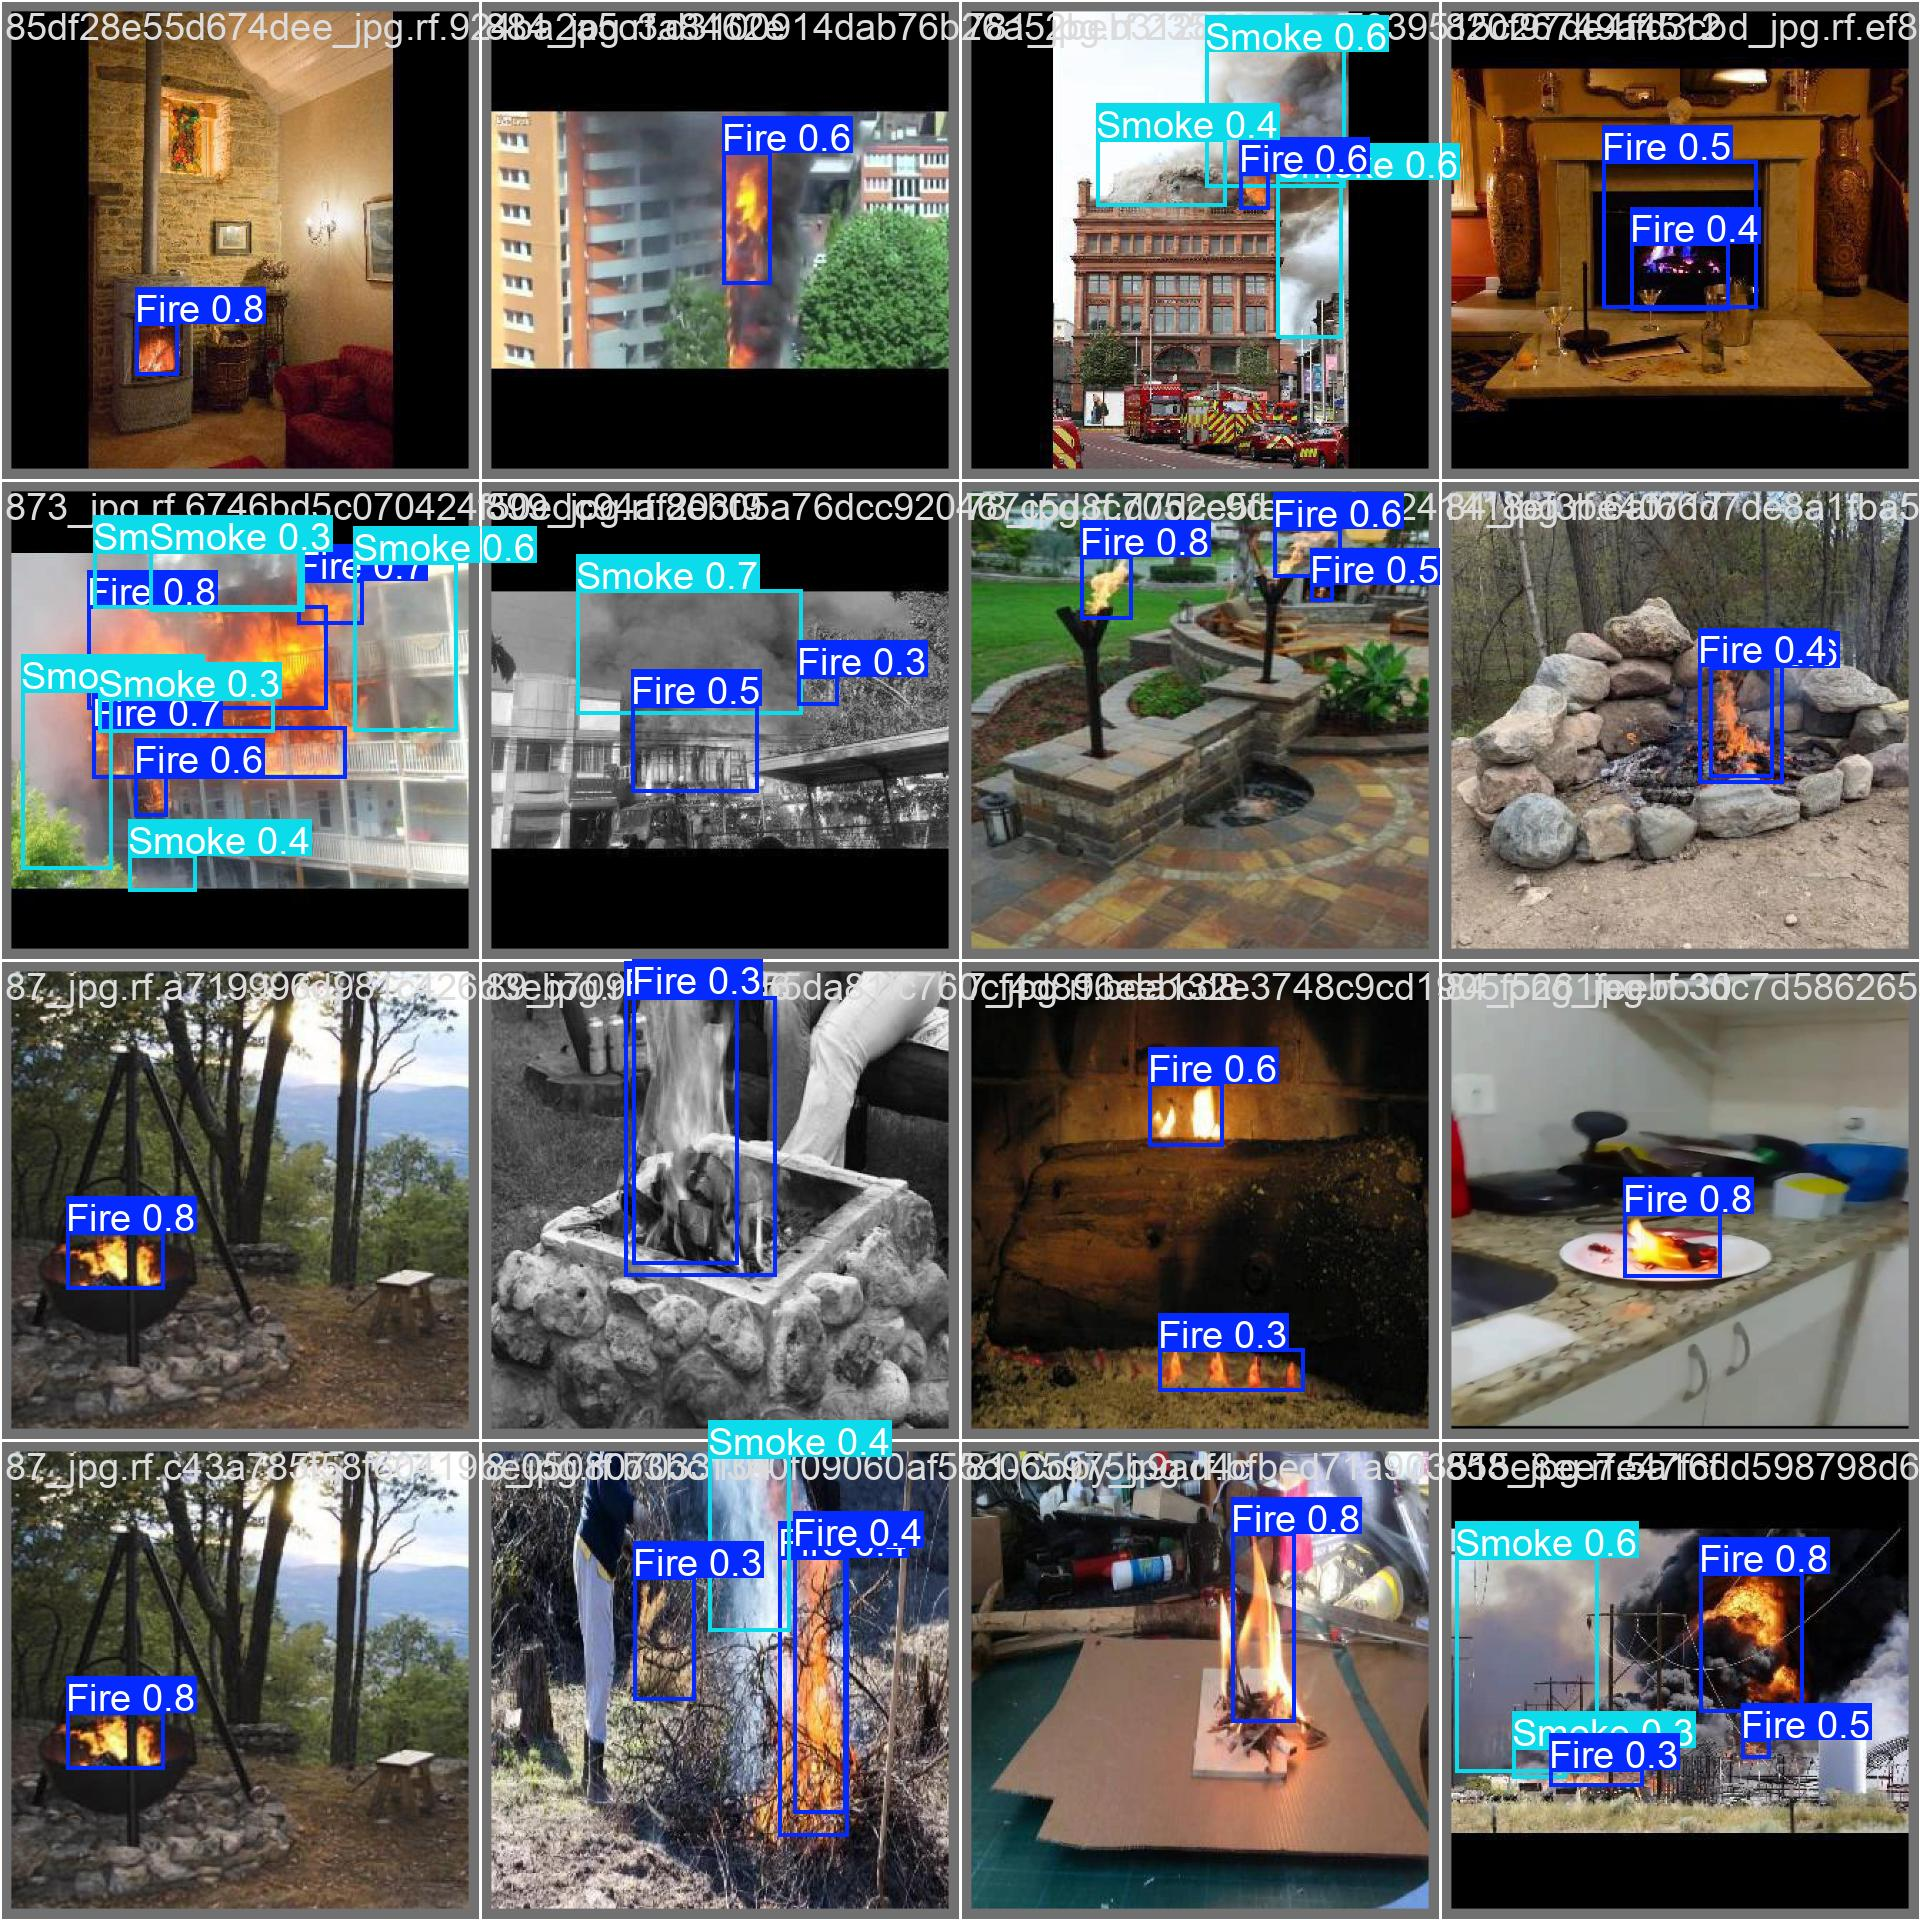

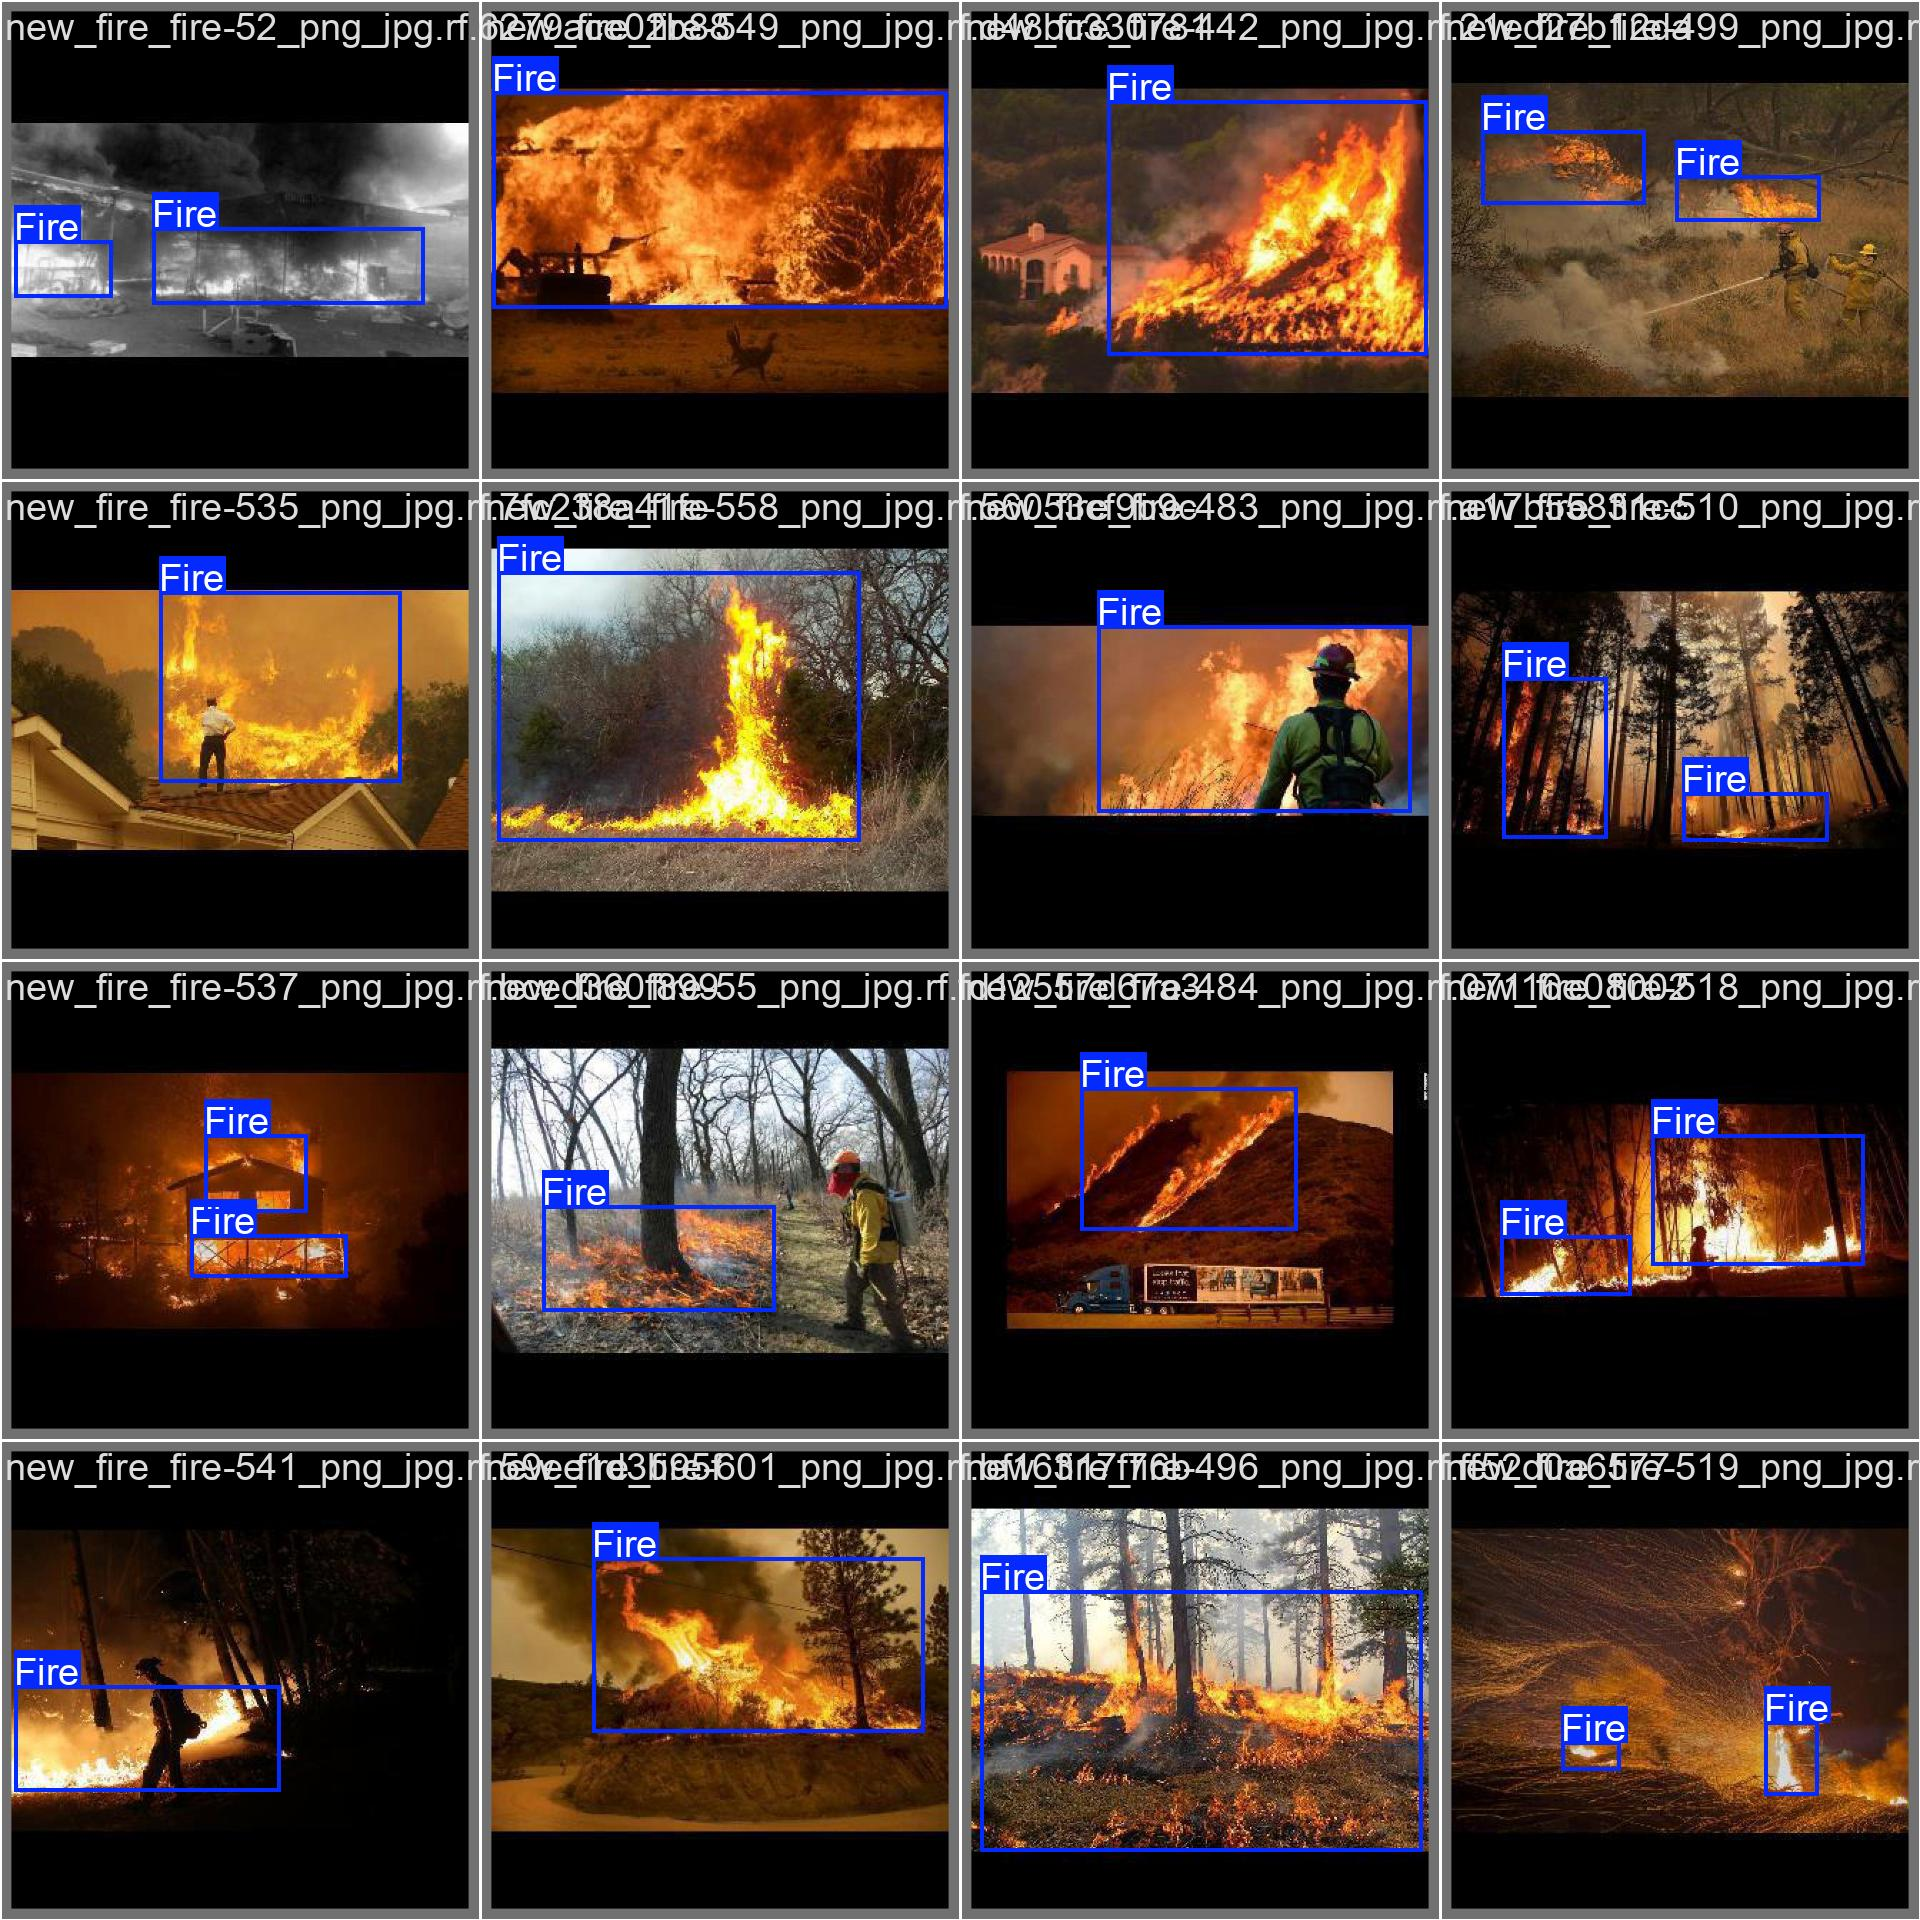

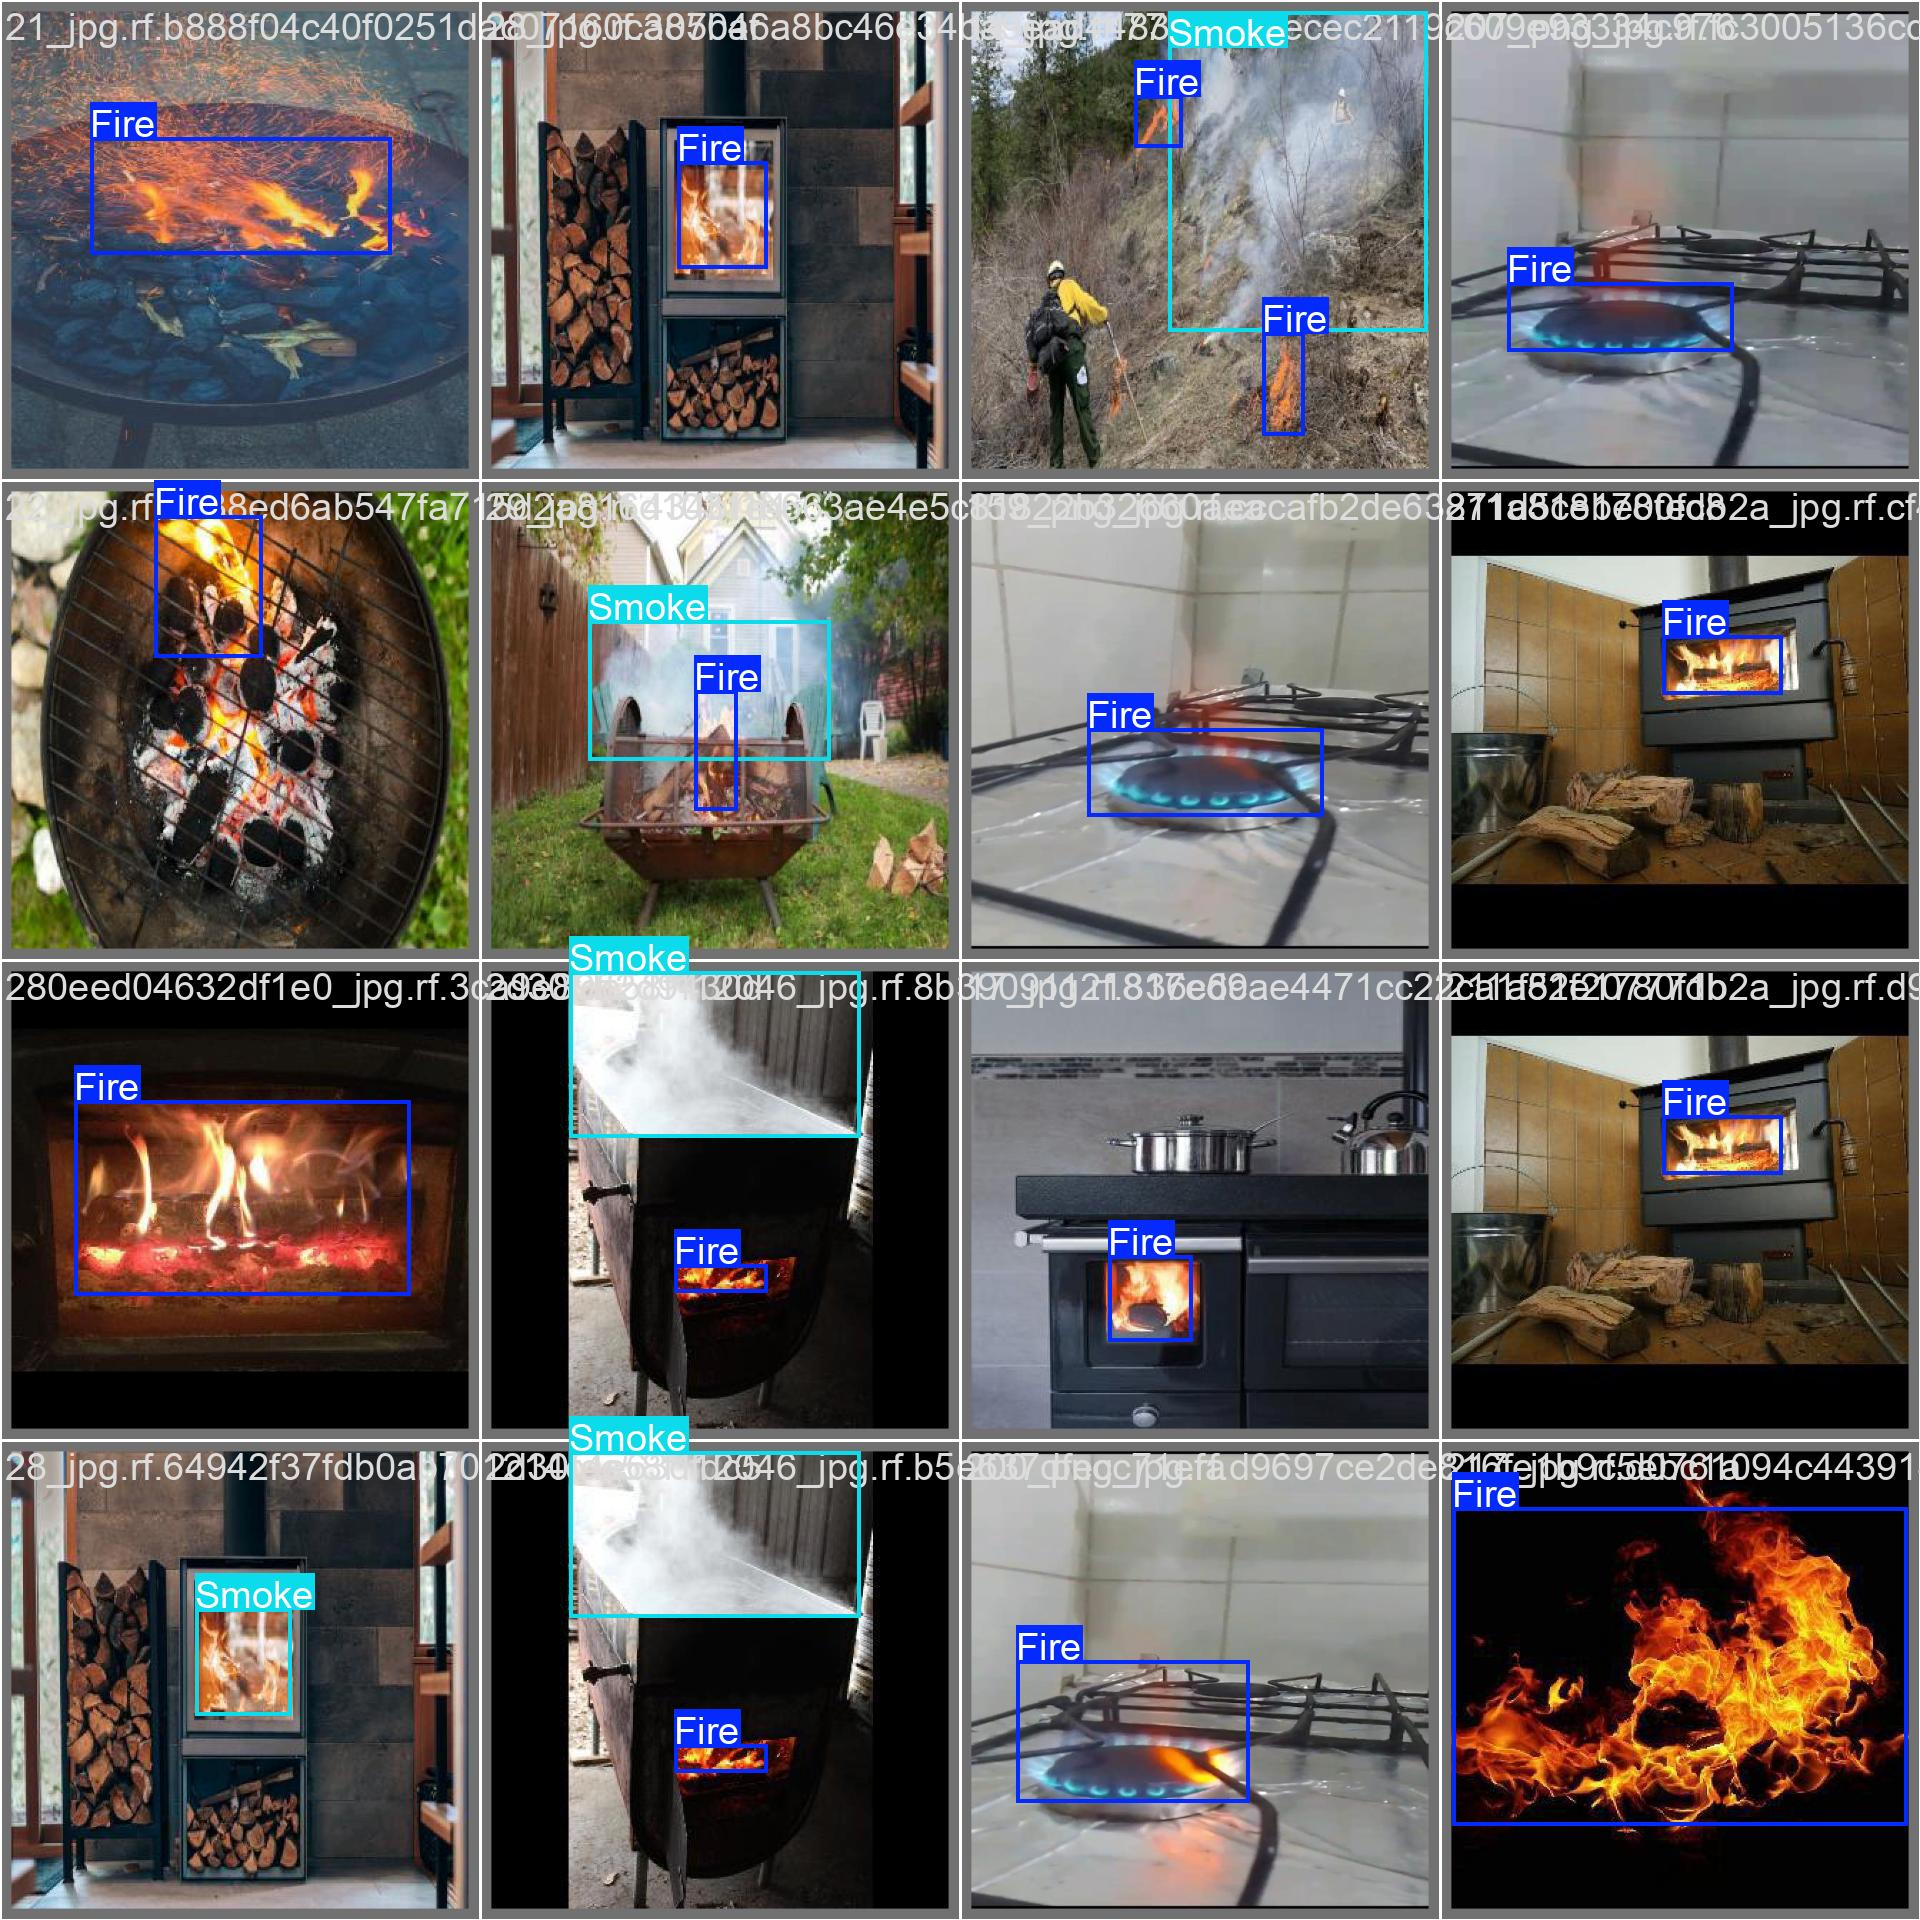

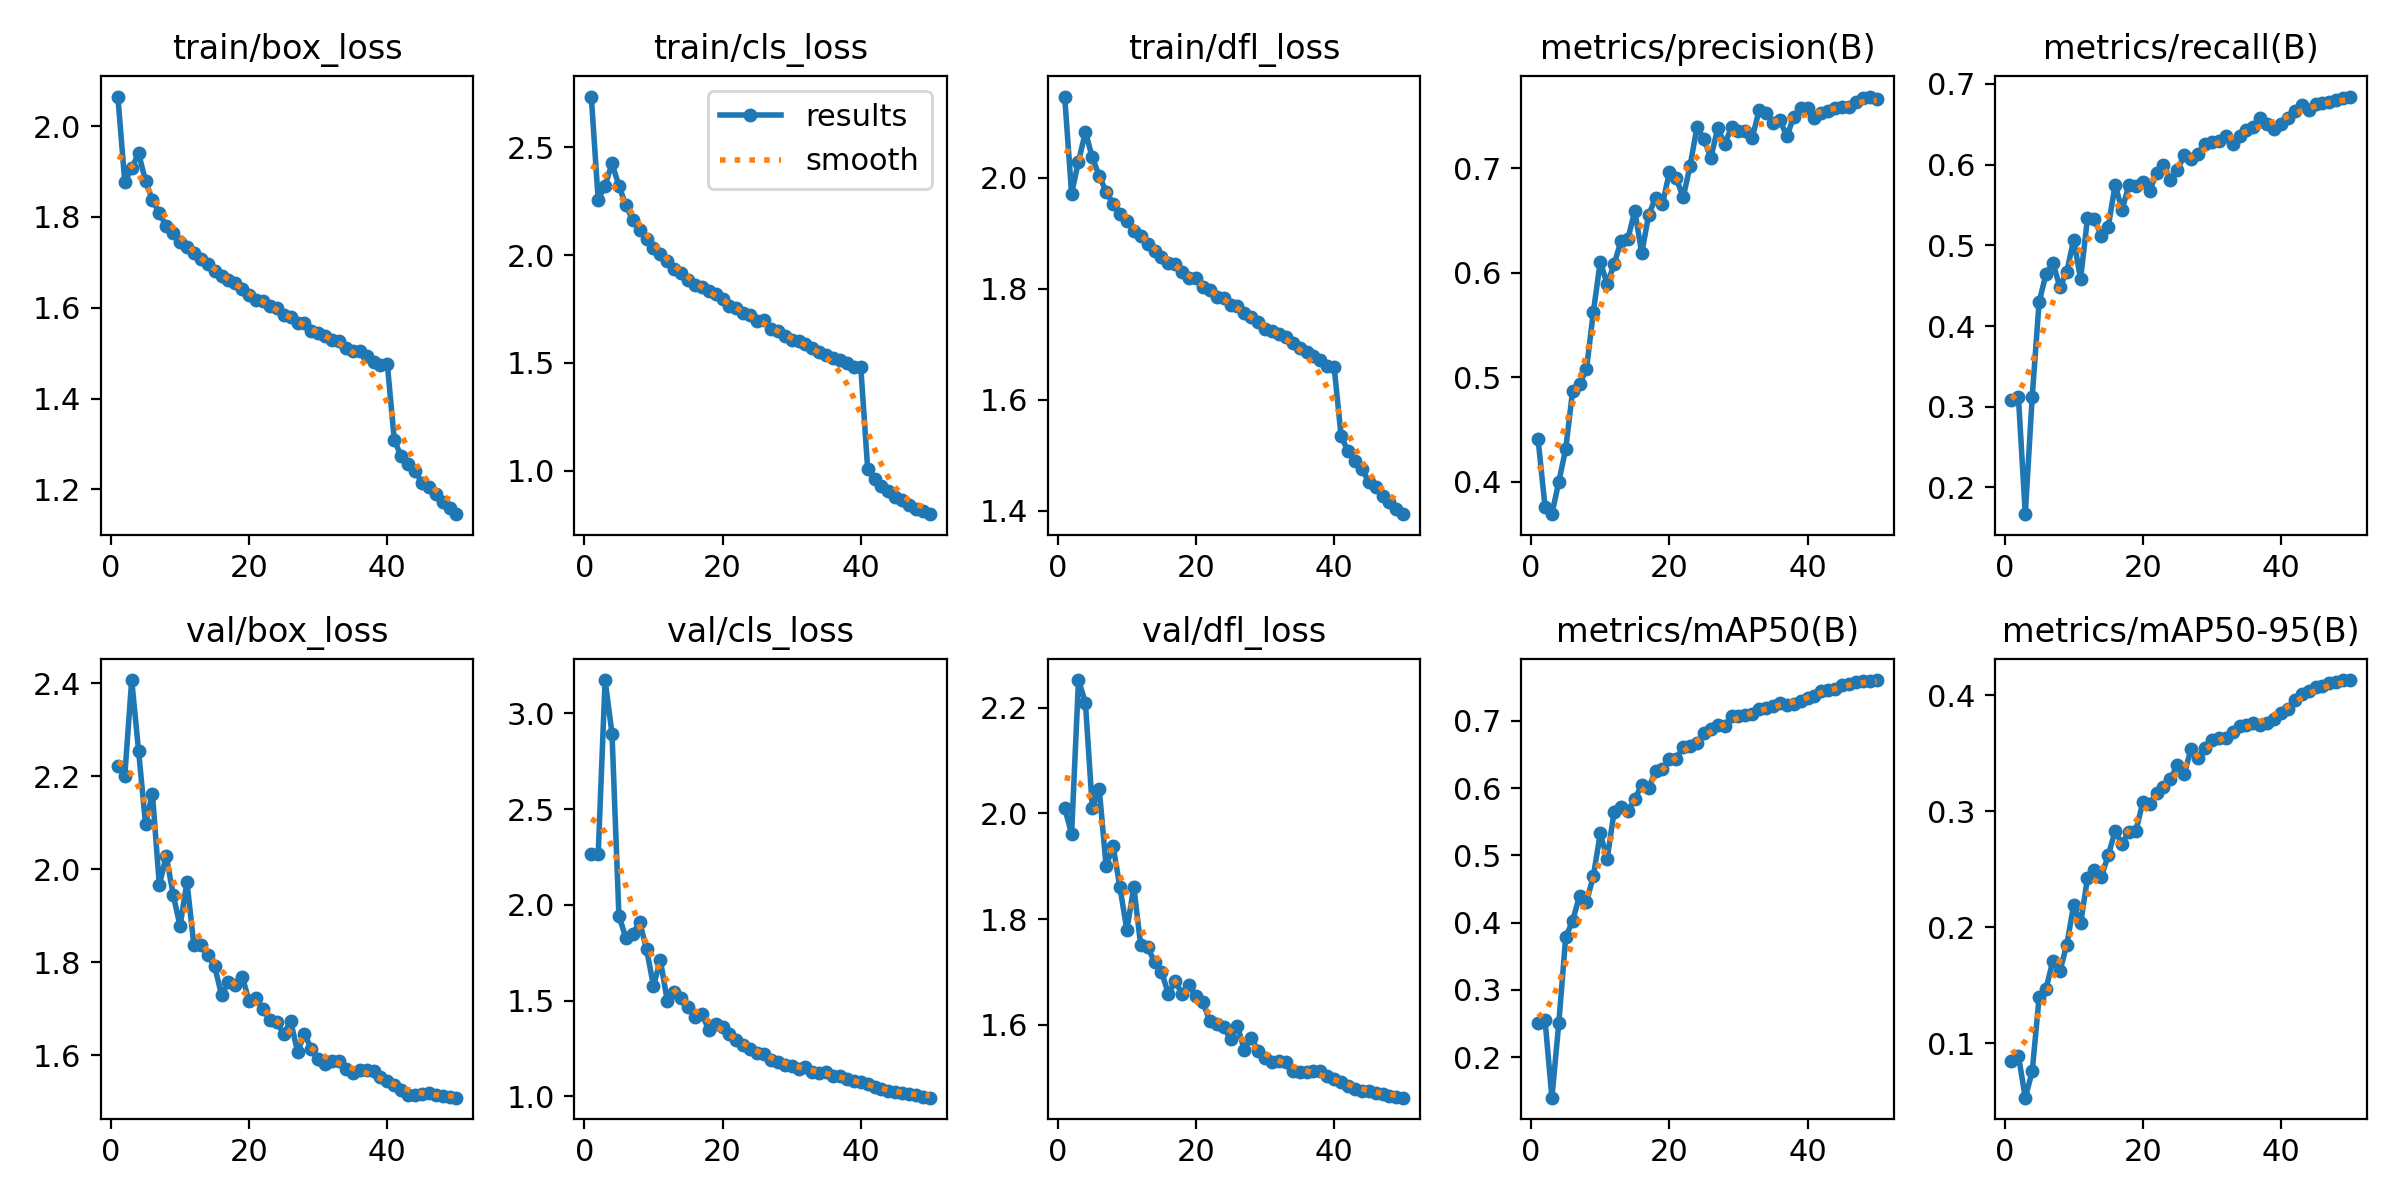

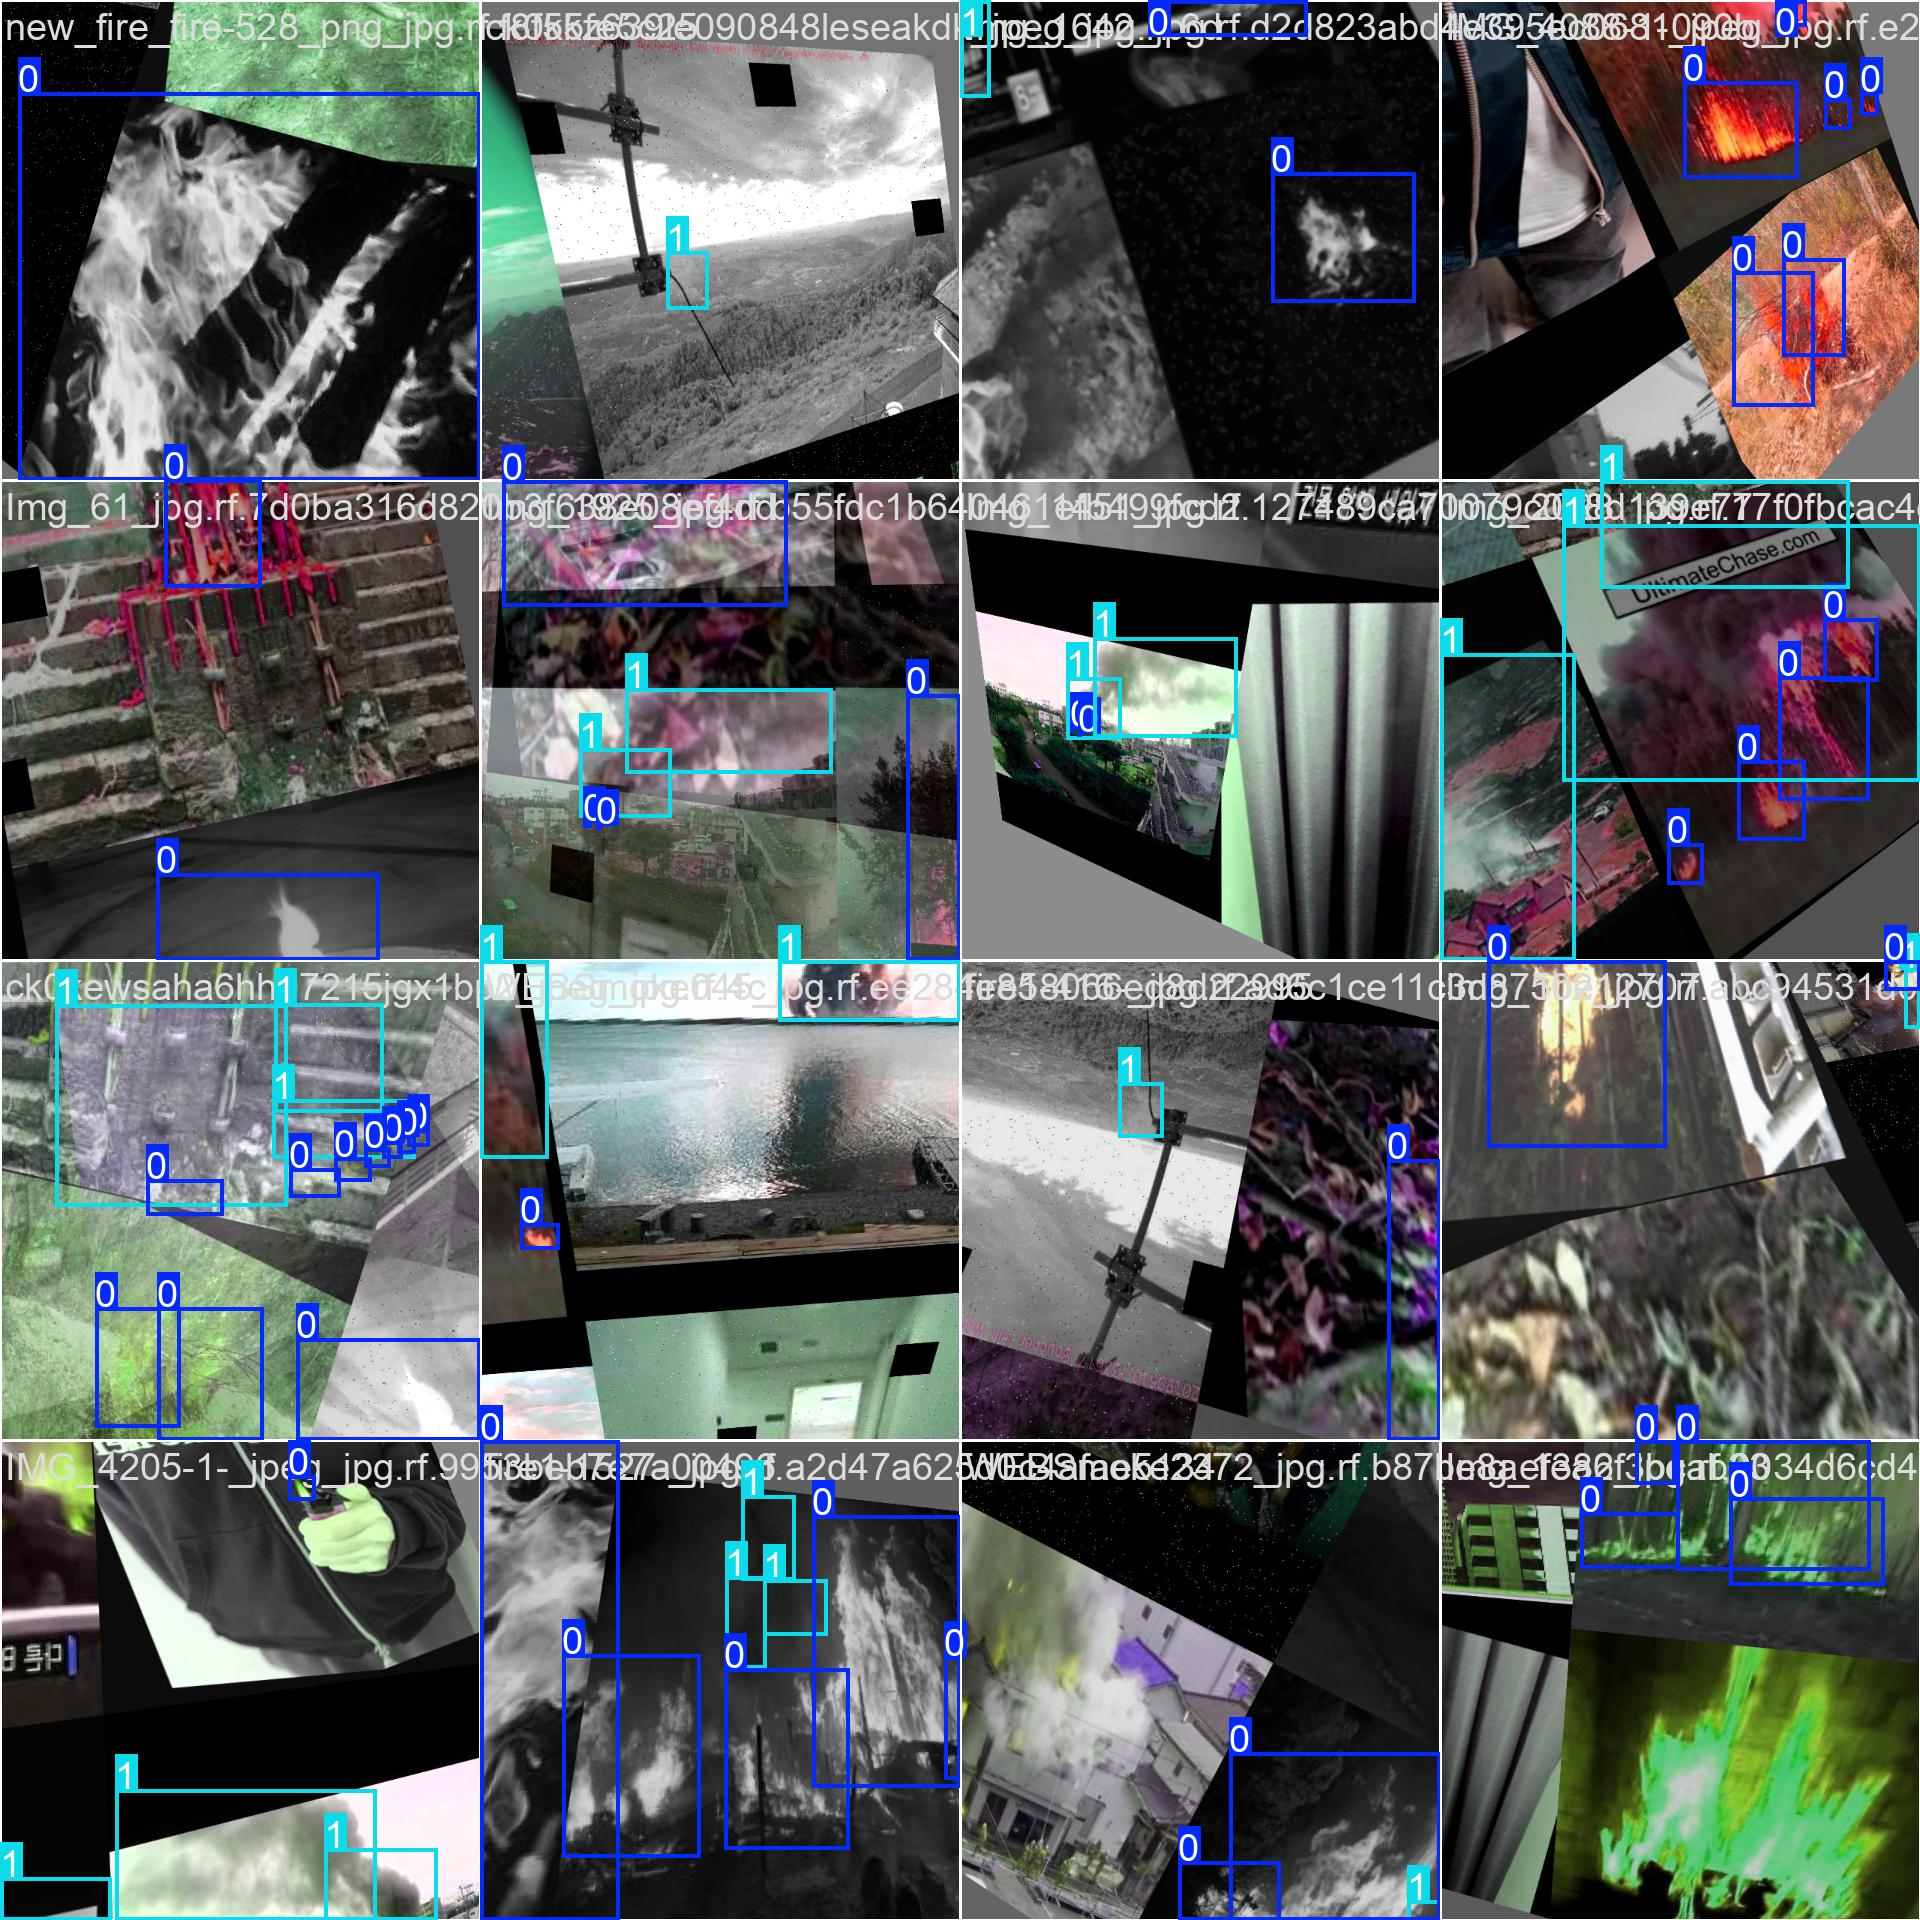

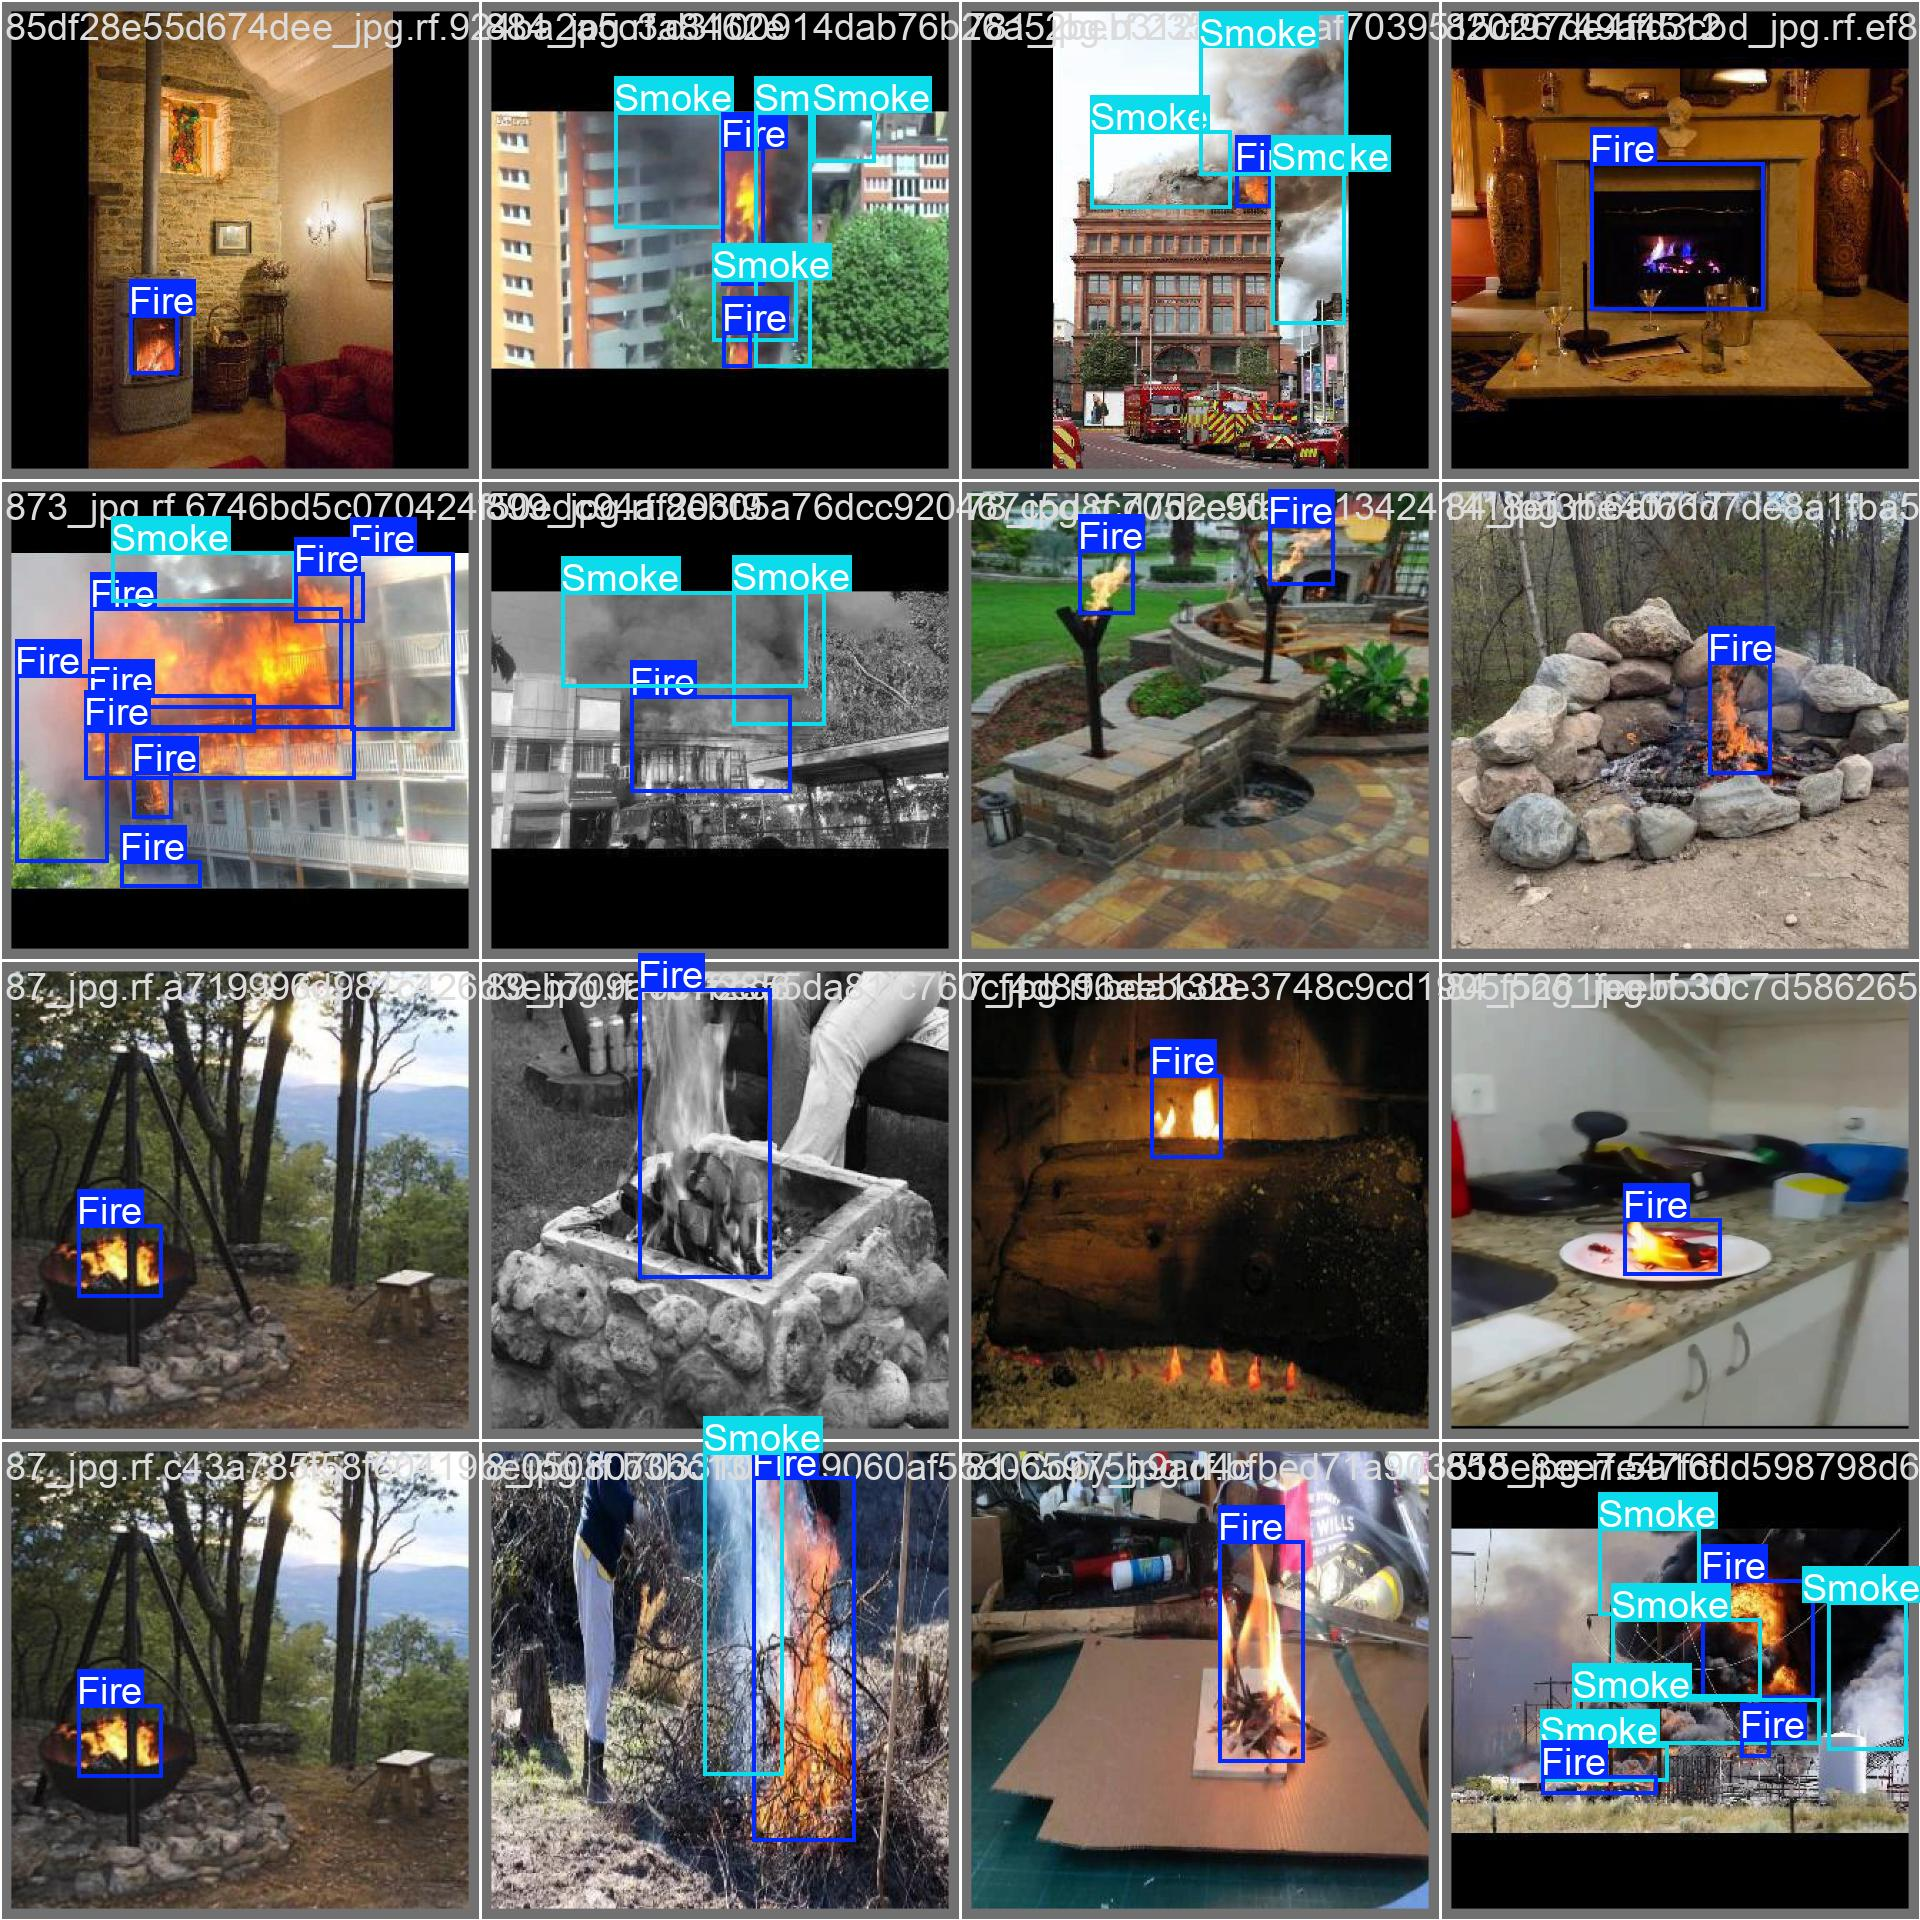

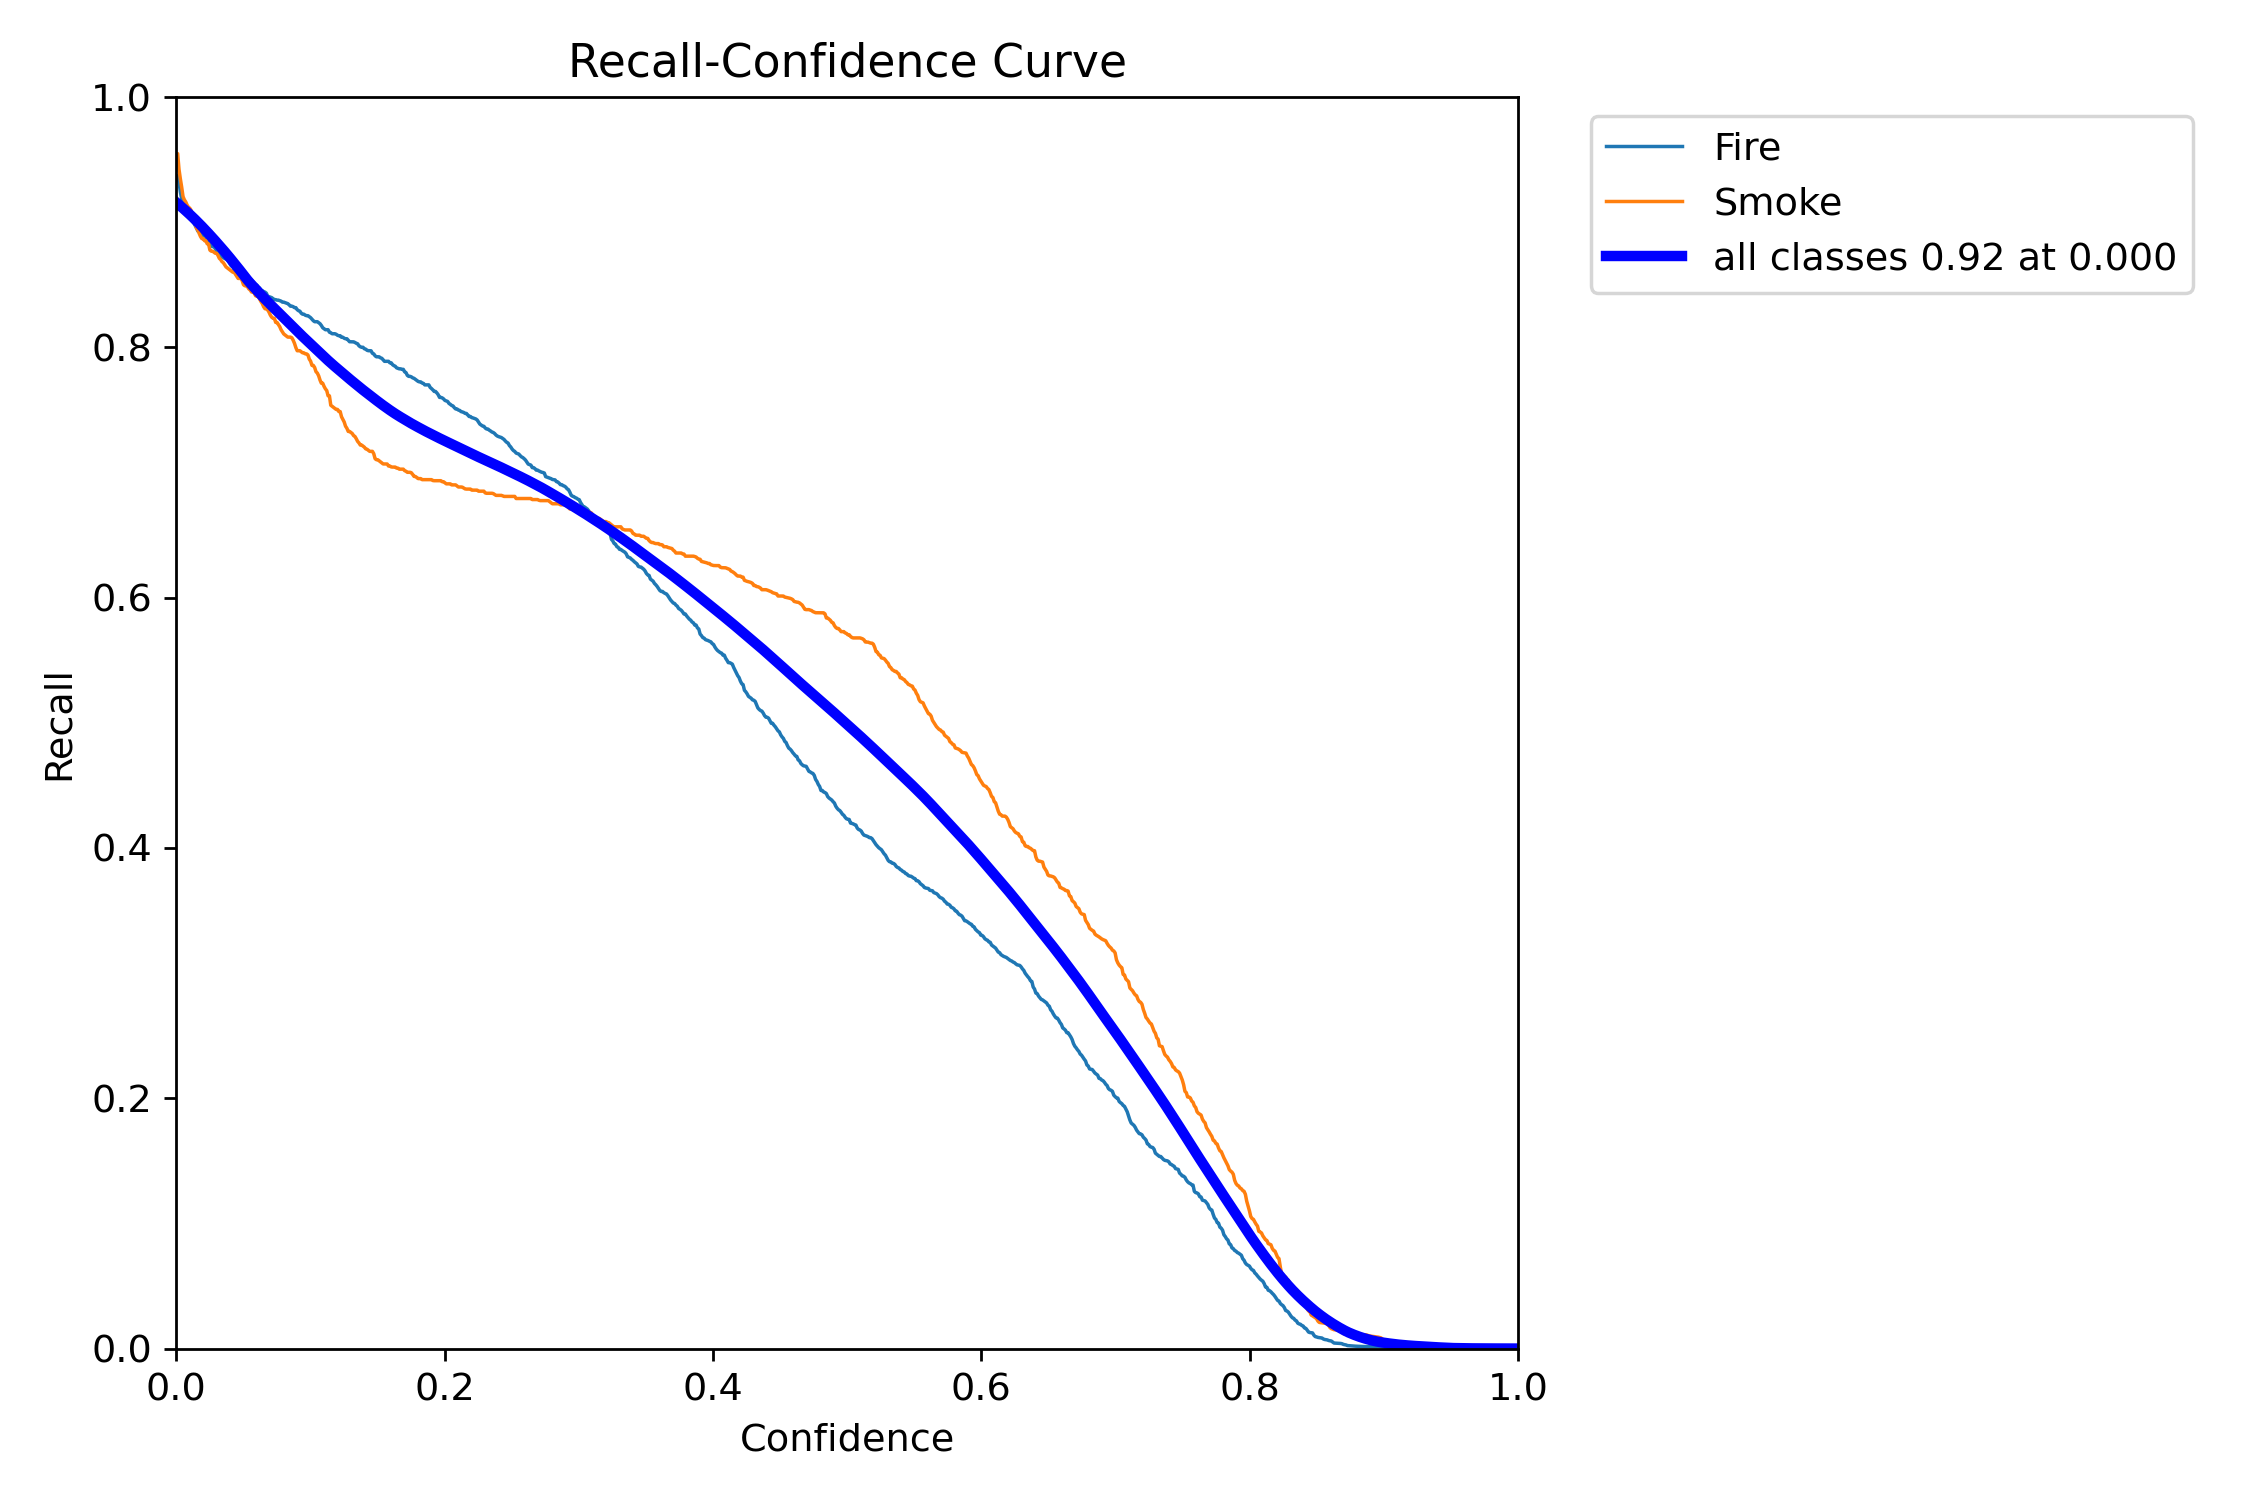

In [27]:
import os
from IPython.display import Image, display

# Path to your results directory
results_path = '/kaggle/working/runs/detect/fire-smoke-combined7'  # Change if it's different

# List all image files in the folder
images = [img for img in os.listdir(results_path) if img.endswith(('.jpg', '.png'))]

# Display first few result images (you can increase the range if needed)
for img_name in images[:10]:
    display(Image(filename=os.path.join(results_path, img_name)))